<a href="https://colab.research.google.com/github/RizqiNurSyaban/laravel_youtube_complete_project/blob/main/tugas_akhir_DAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Develop an AI-powered library ecosystem called 'LibrAIry Indonesia' that integrates Computer Vision for book detection and OCR, Natural Language Processing for semantic search and content understanding, a robust Recommender System for personalized suggestions, and Text-to-Speech for audio summaries, culminating in a comprehensive overview demonstrating the functionality and integration of these core features within a user-friendly interface.

## Define Core Architecture

### Subtask:
Establish the foundational technical architecture required to support the various AI components (CV, NLP, Recommender Systems, TTS) and their integration within the LibrAIry Indonesia ecosystem.


### 1. Main Architectural Components

The LibrAIry Indonesia ecosystem will be comprised of the following key architectural components:

*   **User Interface (UI):** The primary interface for users to interact with the LibrAIry system.
*   **API Gateway:** A single entry point for all client requests, responsible for routing, load balancing, authentication, and security.
*   **Backend Services:** Core application logic, business rules, and orchestration of various AI and data services.
*   **AI Modules:**
    *   **Computer Vision (CV):** For processing and understanding image-based content (e.g., book cover recognition, text extraction from images).
    *   **Natural Language Processing (NLP):** For text analysis, search, summarization, and understanding user queries.
    *   **Recommender System:** For personalized book recommendations based on user preferences and behavior.
    *   **Text-to-Speech (TTS):** For converting text content into spoken audio (e.g., audiobook generation, accessibility features).
*   **Central Database:** Stores all structured data, including user profiles, book metadata, interaction logs, and potentially AI model configurations.
*   **Data Lake/Object Storage:** For storing unstructured data such as raw images, audio files, and large text datasets.
*   **Message Broker/Queue:** Enables asynchronous communication between services, facilitating scalability and decoupling.
*   **Monitoring and Logging:** Systems for tracking application performance, errors, and user activity.
*   **Deployment and Orchestration:** Tools for managing the deployment, scaling, and operation of microservices and AI models.

### 2. Proposed Technologies and Frameworks

To implement the architectural components, we propose the following technologies and frameworks:

*   **User Interface (UI):**
    *   **Frontend Framework:** React or Vue.js for dynamic and responsive user experiences.
    *   **Mobile Development:** React Native or Flutter for cross-platform mobile applications (if applicable).

*   **API Gateway:**
    *   **Cloud Provider Services:** AWS API Gateway, Google Cloud Endpoints, or Azure API Management for managed services offering routing, throttling, authentication, and monitoring.
    *   **Open Source:** Kong Gateway or Apache APISIX for self-hosted solutions.

*   **Backend Services:**
    *   **Language:** Python (for its rich ecosystem in AI/ML and rapid development).
    *   **Web Framework:** FastAPI (for high performance and easy API development) or Django (for comprehensive features and robustness, especially for larger applications).
    *   **Microservices Orchestration:** Kubernetes (K8s) for container orchestration, deployment, and scaling.

*   **AI Modules:**
    *   **General ML Frameworks:** TensorFlow, PyTorch for model development and training.
    *   **Computer Vision (CV):** OpenCV, scikit-image for image processing; YOLO, RetinaNet (with TensorFlow/PyTorch) for object detection; Tesseract for OCR.
    *   **Natural Language Processing (NLP):** Hugging Face Transformers for state-of-the-art models (BERT, GPT variants), spaCy or NLTK for text processing, Elasticsearch for search capabilities.
    *   **Recommender System:** Scikit-learn (for traditional methods like collaborative filtering, content-based filtering), TensorFlow Recommenders, PyTorch-Lightning for deep learning based recommenders.
    *   **Text-to-Speech (TTS):** Google Cloud Text-to-Speech, Amazon Polly, or custom models using Tacotron/WaveNet with TensorFlow/PyTorch.
    *   **Model Deployment:** FastAPI/Flask for serving individual models as microservices; NVIDIA Triton Inference Server for optimized multi-model inference.

*   **Central Database:**
    *   **Relational Database:** PostgreSQL (for robust transactional support and extensibility) for structured data like user profiles, book metadata.
    *   **NoSQL Database:** MongoDB or Cassandra for flexible schemas and high scalability (e.g., for analytics, logs).

*   **Data Lake/Object Storage:**
    *   **Cloud Provider Services:** AWS S3, Google Cloud Storage, or Azure Blob Storage for scalable, cost-effective storage of unstructured data.

*   **Message Broker/Queue:**
    *   **Messaging Queue:** Apache Kafka or RabbitMQ for asynchronous communication between services, event streaming, and data ingestion.

*   **Monitoring and Logging:**
    *   **Monitoring:** Prometheus (metrics collection) and Grafana (dashboarding) or cloud-native solutions (e.g., AWS CloudWatch, Google Cloud Monitoring).
    *   **Logging:** ELK Stack (Elasticsearch, Logstash, Kibana) or cloud-native solutions (e.g., Google Cloud Logging).

*   **Deployment and Orchestration:**
    *   **Containerization:** Docker for packaging applications and their dependencies.
    *   **Orchestration:** Kubernetes (K8s) for managing, scaling, and deploying containerized applications.
    *   **CI/CD:** Jenkins, GitLab CI/CD, or GitHub Actions for automated build, test, and deployment pipelines.

*   **Cloud Deployment:**
    *   **Primary Cloud Provider:** Google Cloud Platform (GCP) or Amazon Web Services (AWS) for their comprehensive suite of AI/ML services, scalability, and global reach. This choice would depend on factors like cost, existing infrastructure, and specific service offerings.

### 3. High-Level Data Flow and Interaction Points

The interaction within the LibrAIry Indonesia ecosystem generally follows a request-response pattern, often augmented with asynchronous processing for AI tasks.

1.  **User Interaction (UI -> API Gateway):**
    *   Users interact with the UI (web or mobile application) to perform actions like searching for books, viewing recommendations, uploading images of book covers, or requesting audio versions of text.
    *   All user requests from the UI are routed through the **API Gateway**. The API Gateway handles authentication, rate limiting, and directs the request to the appropriate Backend Service.

2.  **Backend Services Processing (API Gateway -> Backend Services -> Central Database / AI Modules):**
    *   The **Backend Services** receive requests from the API Gateway.
    *   For requests requiring simple data retrieval or updates (e.g., fetching user profiles, updating book status), the Backend Services interact directly with the **Central Database**.
    *   For requests involving AI capabilities, the Backend Services act as orchestrators:
        *   **Search/NLP:** A search query might be passed to the NLP module for semantic understanding or keyword extraction, which then queries the Central Database or a dedicated search index (e.g., Elasticsearch).
        *   **Recommendations:** When a user requests recommendations, the Backend Service queries the Recommender System module, potentially providing user history and current context.
        *   **Computer Vision:** If a user uploads a book cover image, the Backend Service sends this image to the CV module (e.g., for book identification or OCR). Large files might first be stored in the Data Lake/Object Storage, and a reference passed to the CV module.
        *   **Text-to-Speech:** If a user requests an audio version of a book, the Backend Service sends the text content to the TTS module. The generated audio file might be stored in the Data Lake/Object Storage, and a URL returned to the user.

3.  **AI Module Processing (AI Modules -> Data Lake/Object Storage -> Message Broker):**
    *   **AI Modules** (CV, NLP, Recommender, TTS) process their respective tasks. These tasks can be computationally intensive and may involve retrieving large datasets from the **Data Lake/Object Storage** (e.g., training data, raw input files).
    *   For asynchronous tasks (e.g., generating an audiobook, processing a large image batch), the AI module might publish a message to the **Message Broker/Queue** upon completion. This allows the Backend Service to acknowledge the request and respond to the user immediately, while the AI task runs in the background. Once completed, the result is stored, and the user is notified.

4.  **Result Delivery (AI Modules / Backend Services -> API Gateway -> UI):**
    *   Once the Backend Services or AI Modules have processed the request, the results are sent back through the API Gateway to the User Interface.
    *   For asynchronous tasks, the UI might poll for results or receive real-time updates via WebSockets.

**Data Flow Summary:**

`UI <-> API Gateway <-> Backend Services <-> (Central Database | AI Modules)`
`AI Modules <-> (Data Lake/Object Storage | Message Broker)`

### 4. Scalability and Modularity

The proposed architecture is designed with scalability and modularity as core principles to ensure the LibrAIry Indonesia ecosystem can evolve and grow effectively.

*   **Microservices Architecture:** The system is inherently designed as a collection of loosely coupled, independently deployable services. Each AI module (CV, NLP, Recommender, TTS) and core backend service operates as a separate microservice. This allows:
    *   **Independent Development:** Teams can develop, test, and deploy services independently without impacting others.
    *   **Technology Diversity:** Different services can utilize the most appropriate technology stack for their specific needs.
    *   **Easier Maintenance:** Isolating services makes debugging and maintenance more straightforward.

*   **Containerization (Docker) and Orchestration (Kubernetes):**
    *   **Scalability:** Kubernetes enables automatic scaling of individual microservices based on demand. If the NLP service experiences high load, Kubernetes can spin up more instances of just that service without affecting others.
    *   **Resilience:** Kubernetes ensures high availability by automatically restarting failed containers and distributing traffic.
    *   **Resource Efficiency:** Containers provide lightweight, isolated environments, optimizing resource utilization.

*   **API Gateway:** Acts as a single entry point, abstracting the complexity of the underlying microservices. It allows for versioning of APIs, enabling gradual updates and changes to services without breaking client applications.

*   **Message Broker/Queue (Kafka/RabbitMQ):** Facilitates asynchronous communication, decoupling services further. When an AI task is computationally intensive (e.g., TTS generation), the request can be put into a queue, and the AI service can process it at its own pace. The backend doesn't wait, preventing bottlenecks and improving user experience. This also allows for:
    *   **Load Leveling:** Distributes workload efficiently across services.
    *   **Fault Tolerance:** If a service goes down, messages can persist in the queue and be processed once the service recovers.

*   **Cloud-Native Design:** Leveraging cloud providers like GCP or AWS provides access to managed services that inherently offer scalability, reliability, and global reach. Services like managed databases, object storage, and AI services can scale on demand without significant operational overhead.

*   **Stateless Services:** Where possible, backend and AI services should be stateless, making them easier to scale horizontally. Session data or persistent state should be offloaded to dedicated databases or caching layers.

By adopting these principles and technologies, the LibrAIry Indonesia architecture will be highly flexible, capable of scaling to meet increasing user demands, and adaptable to future technological advancements and new AI capabilities.

### 4. Scalability and Modularity

The proposed architecture is designed with scalability and modularity as core principles to ensure the LibrAIry Indonesia ecosystem can evolve and grow effectively.

*   **Microservices Architecture:** The system is inherently designed as a collection of loosely coupled, independently deployable services. Each AI module (CV, NLP, Recommender, TTS) and core backend service operates as a separate microservice. This allows:
    *   **Independent Development:** Teams can develop, test, and deploy services independently without impacting others.
    *   **Technology Diversity:** Different services can utilize the most appropriate technology stack for their specific needs.
    *   **Easier Maintenance:** Isolating services makes debugging and maintenance more straightforward.

*   **Containerization (Docker) and Orchestration (Kubernetes):**
    *   **Scalability:** Kubernetes enables automatic scaling of individual microservices based on demand. If the NLP service experiences high load, Kubernetes can spin up more instances of just that service without affecting others.
    *   **Resilience:** Kubernetes ensures high availability by automatically restarting failed containers and distributing traffic.
    *   **Resource Efficiency:** Containers provide lightweight, isolated environments, optimizing resource utilization.

*   **API Gateway:** Acts as a single entry point, abstracting the complexity of the underlying microservices. It allows for versioning of APIs, enabling gradual updates and changes to services without breaking client applications.

*   **Message Broker/Queue (Kafka/RabbitMQ):** Facilitates asynchronous communication, decoupling services further. When an AI task is computationally intensive (e.g., TTS generation), the request can be put into a queue, and the AI service can process it at its own pace. The backend doesn't wait, preventing bottlenecks and improving user experience. This also allows for:
    *   **Load Leveling:** Distributes workload efficiently across services.
    *   **Fault Tolerance:** If a service goes down, messages can persist in the queue and be processed once the service recovers.

*   **Cloud-Native Design:** Leveraging cloud providers like GCP or AWS provides access to managed services that inherently offer scalability, reliability, and global reach. Services like managed databases, object storage, and AI services can scale on demand without significant operational overhead.

*   **Stateless Services:** Where possible, backend and AI services should be stateless, making them easier to scale horizontally. Session data or persistent state should be offloaded to dedicated databases or caching layers.

By adopting these principles and technologies, the LibrAIry Indonesia architecture will be highly flexible, capable of scaling to meet increasing user demands, and adaptable to future technological advancements and new AI capabilities.

## Develop Visual Input (CV) Module

### Subtask:
Develop the Computer Vision module, including object detection for books on shelves, optical character recognition (OCR) for title/author extraction, and linking detected books to a digital catalog.


## Develop Visual Input (CV) Module

### Subtask:
Develop the Computer Vision module, including object detection for books on shelves, optical character recognition (OCR) for title/author extraction, and linking detected books to a digital catalog.

#### Instructions
1. Set up the development environment by installing necessary Computer Vision libraries and frameworks, such as OpenCV, TensorFlow or PyTorch, and Tesseract OCR. Make sure to also install any required Python packages for image processing.


## Develop Visual Input (CV) Module

### Subtask:
Develop the Computer Vision module, including object detection for books on shelves, optical character recognition (OCR) for title/author extraction, and linking detected books to a digital catalog.

#### Instructions
1. Set up the development environment by installing necessary Computer Vision libraries and frameworks, such as OpenCV, TensorFlow or PyTorch, and Tesseract OCR. Make sure to also install any required Python packages for image processing.
2. Implement a function for object detection that can identify and localize books within an image. This could involve using a pre-trained model (e.g., from the YOLO or RetinaNet family) or fine-tuning one on a custom dataset if necessary. The output should be bounding box coordinates for each detected book.
3. For each detected book, crop the relevant region from the original image. Apply Optical Character Recognition (OCR) to these cropped regions to extract potential titles and authors. Consider pre-processing steps like image enhancement (e.g., binarization, de-skewing) to improve OCR accuracy.
4. Develop a mechanism to match the extracted titles and authors from OCR against a digital catalog (e.g., a database of books). This matching should account for potential OCR errors and variations in text, possibly using string similarity algorithms (e.g., Levenshtein distance, fuzzy matching) to find the most probable match in the catalog.
5. Design the output of this module to include the original image with detected book bounding boxes, the extracted text from OCR, and the corresponding matched catalog entry (e.g., book ID, full title, author from the catalog).


## Develop Visual Input (CV) Module

### Subtask:
Develop the Computer Vision module, including object detection for books on shelves, optical character recognition (OCR) for title/author extraction, and linking detected books to a digital catalog.

#### Instructions
1. Set up the development environment by installing necessary Computer Vision libraries and frameworks, such as OpenCV, TensorFlow or PyTorch, and Tesseract OCR. Make sure to also install any required Python packages for image processing.
2. Implement a function for object detection that can identify and localize books within an image. This could involve using a pre-trained model (e.g., from the YOLO or RetinaNet family) or fine-tuning one on a custom dataset if necessary. The output should be bounding box coordinates for each detected book.
3. For each detected book, crop the relevant region from the original image. Apply Optical Character Recognition (OCR) to these cropped regions to extract potential titles and authors. Consider pre-processing steps like image enhancement (e.g., binarization, de-skewing) to improve OCR accuracy.
4. Develop a mechanism to match the extracted titles and authors from OCR against a digital catalog (e.g., a database of books). This matching should account for potential OCR errors and variations in text, possibly using string similarity algorithms (e.g., Levenshtein distance, fuzzy matching) to find the most probable match in the catalog.
5. Design the output of this module to include the original image with detected book bounding boxes, the extracted text from OCR, and the corresponding matched catalog entry (e.g., book ID, full title, author from the catalog).


## Develop Visual Input (CV) Module

### Subtask:
Develop the Computer Vision module, including object detection for books on shelves, optical character recognition (OCR) for title/author extraction, and linking detected books to a digital catalog.

#### Instructions
1. Set up the development environment by installing necessary Computer Vision libraries and frameworks, such as OpenCV, TensorFlow or PyTorch, and Tesseract OCR. Make sure to also install any required Python packages for image processing.
2. Implement a function for object detection that can identify and localize books within an image. This could involve using a pre-trained model (e.g., from the YOLO or RetinaNet family) or fine-tuning one on a custom dataset if necessary. The output should be bounding box coordinates for each detected book.
3. For each detected book, crop the relevant region from the original image. Apply Optical Character Recognition (OCR) to these cropped regions to extract potential titles and authors. Consider pre-processing steps like image enhancement (e.g., binarization, de-skewing) to improve OCR accuracy.
4. Develop a mechanism to match the extracted titles and authors from OCR against a digital catalog (e.g., a database of books). This matching should account for potential OCR errors and variations in text, possibly using string similarity algorithms (e.g., Levenshtein distance, fuzzy matching) to find the most probable match in the catalog.
5. Design the output of this module to include the original image with detected book bounding boxes, the extracted text from OCR, and the corresponding matched catalog entry (e.g., book ID, full title, author from the catalog).


## Develop Visual Input (CV) Module

### Subtask:
Develop the Computer Vision module, including object detection for books on shelves, optical character recognition (OCR) for title/author extraction, and linking detected books to a digital catalog.

#### Instructions
1. Set up the development environment by installing necessary Computer Vision libraries and frameworks, such as OpenCV, TensorFlow or PyTorch, and Tesseract OCR. Make sure to also install any required Python packages for image processing.
2. Implement a function for object detection that can identify and localize books within an image. This could involve using a pre-trained model (e.g., from the YOLO or RetinaNet family) or fine-tuning one on a custom dataset if necessary. The output should be bounding box coordinates for each detected book.
3. For each detected book, crop the relevant region from the original image. Apply Optical Character Recognition (OCR) to these cropped regions to extract potential titles and authors. Consider pre-processing steps like image enhancement (e.g., binarization, de-skewing) to improve OCR accuracy.
4. Develop a mechanism to match the extracted titles and authors from OCR against a digital catalog (e.g., a database of books). This matching should account for potential OCR errors and variations in text, possibly using string similarity algorithms (e.g., Levenshtein distance, fuzzy matching) to find the most probable match in the catalog.
5. Design the output of this module to include the original image with detected book bounding boxes, the extracted text from OCR, and the corresponding matched catalog entry (e.g., book ID, full title, author from the catalog).


**Reasoning**:
The first instruction is to set up the development environment, which involves installing various libraries and frameworks. This code block will install the required Python packages for Computer Vision and OCR.



In [1]:
print("Installing necessary libraries for CV module...")
!pip install opencv-python tensorflow pytesseract
!apt-get update
!apt-get install -y tesseract-ocr
print("Libraries installed successfully.")

Installing necessary libraries for CV module...
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,860 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [6,205 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [6,411 kB]
Get:13 https://r2u.stat.illinois.edu/ubu

### Implement Object Detection for Books

**Instruction 2:** Implement a function for object detection that can identify and localize books within an image. This could involve using a pre-trained model (e.g., from the YOLO or RetinaNet family) or fine-tuning one on a custom dataset if necessary. The output should be bounding box coordinates for each detected book.

### Implement Object Detection for Books\n\nTo implement object detection for books, we will use a pre-trained YOLOv5 model. YOLO (You Only Look Once) is a popular object detection algorithm known for its speed and accuracy. We will load a pre-trained model and define a function that takes an image as input and returns the bounding box coordinates for each detected book.\n\n**Instruction 2:** Implement a function for object detection that can identify and localize books within an image. This could involve using a pre-trained model (e.g., from the YOLO or RetinaNet family) or fine-tuning one on a custom dataset if necessary. The output should be bounding box coordinates for each detected book.

**Reasoning**:
Before implementing the object detection function, it's necessary to install the `ultralytics` library, which provides access to YOLOv5 models, as it was not included in the initial environment setup.



In [2]:
print("Installing ultralytics for YOLOv5...")
!pip install ultralytics
print("ultralytics installed successfully.")

Installing ultralytics for YOLOv5...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.8 MB/s eta 0:00:00
ultralytics installed successfully.


**Reasoning**:
Now that the `ultralytics` library is installed, I will load a pre-trained YOLOv5 model and define a function `detect_books` that takes an image, performs object detection, and returns the bounding box coordinates of the detected books, along with a confidence score for each detection. I will also include a helper function to draw the bounding boxes on the image for visualization and download a sample image to demonstrate its usage.



In [3]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load a pre-trained YOLOv5 model. Using a smaller model like 'yolov5s' for faster inference.
# YOLOv8 is the default in ultralytics now, but YOLOv5 is explicitly mentioned as an option.
# We'll use 'yolov8n.pt' (nano version) for demonstration, which is the successor and commonly used.
print("Loading YOLOv8n model...")
model = YOLO('yolov8n.pt')  # Ensure you have an internet connection to download the model if not cached
print("YOLOv8n model loaded.")

def detect_books(image_path):
    """
    Detects books in an image using a pre-trained YOLO model.

    Args:
        image_path (str): Path to the input image.

    Returns:
        tuple: A tuple containing:
            - np.array: The original image loaded by OpenCV.
            - list: A list of dictionaries, where each dictionary contains 'box' (bounding box
                    coordinates [x1, y1, x2, y2]) and 'confidence' for each detected book.
    """
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    print(f"Detecting objects in {image_path}...")
    results = model(img_rgb, verbose=False) # Perform inference
    print("Detection complete.")

    detections = []
    for r in results:
        for *xyxy, conf, cls in r.boxes.data:
            # Assuming 'book' is a class the model is trained on, or we're detecting general objects
            # For a general model, we might need to filter by class name if available
            # For this example, we'll assume the model can detect books or relevant items
            # and we'll just take all detected objects for now.
            # If a custom dataset was used, we'd specifically look for 'book' class.

            # Convert tensor to numpy array and then to int
            x1, y1, x2, y2 = map(int, [xyxy[0], xyxy[1], xyxy[2], xyxy[3]])
            detections.append({
                'box': [x1, y1, x2, y2],
                'confidence': float(conf)
            })
    return img, detections

def draw_boxes(image, detections, output_path=None):
    """
    Draws bounding boxes and labels on the image.

    Args:
        image (np.array): The input image (OpenCV format).
        detections (list): List of dictionaries, each with 'box' and 'confidence'.
        output_path (str, optional): Path to save the output image. If None, displays the image.
    """
    img_display = image.copy()
    for d in detections:
        x1, y1, x2, y2 = d['box']
        confidence = d['confidence']

        # Draw rectangle
        color = (0, 255, 0) # Green color
        thickness = 2
        cv2.rectangle(img_display, (x1, y1), (x2, y2), color, thickness)

        # Put label
        label = f"Book: {confidence:.2f}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2
        text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > text_size[1] else y1 + text_size[1] + 10 # Adjust text position
        cv2.putText(img_display, label, (text_x, text_y), font, font_scale, color, font_thickness, cv2.LINE_AA)

    if output_path:
        cv2.imwrite(output_path, img_display)
        print(f"Output image saved to {output_path}")
    else:
        plt.figure(figsize=(12, 10))
        plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
        plt.title("Detected Books")
        plt.axis('off')
        plt.show()


# --- Example Usage ---

# Download a sample image (e.g., of a bookshelf)
print("Downloading sample image...")
!wget -nc https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Bookshelf_at_New_York_Public_Library.jpg/640px-Bookshelf_at_New_York_Public_Library.jpg -O sample_bookshelf.jpg
print("Sample image downloaded.")

sample_image_path = 'sample_bookshelf.jpg'

# Detect books
original_image, book_detections = detect_books(sample_image_path)

print(f"Found {len(book_detections)} book-like objects.")
for i, detection in enumerate(book_detections):
    print(f"Detection {i+1}: Box={detection['box']}, Confidence={detection['confidence']:.2f}")

# Visualize detections
draw_boxes(original_image, book_detections)




Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Loading YOLOv8n model...
YOLOv8n model loaded.
--2025-12-29 11:47:34--  https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Bookshelf_at_New_York_Public_Library.jpg/640px-Bookshelf_at_New_York_Public_Library.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 429 Use thumbnail steps listed on https://w.wiki/GHai. Please contact noc@wikimedia.org for further information (a765913)
2025-12-29 11:47:34 ERROR 429: Use thumbnail steps listed on https://w.wiki/GHai. Please contact noc@wikimedia.org for

FileNotFoundError: Image not found at sample_bookshelf.jpg

**Reasoning**:
The previous `wget` command failed due to a `429 Too Many Requests` error, resulting in a `FileNotFoundError` when trying to read the image. I will change the image download URL to a different, more stable source that is less likely to rate-limit, ensuring the sample image is successfully downloaded before detection.



In [4]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load a pre-trained YOLOv5 model. Using a smaller model like 'yolov5s' for faster inference.
# YOLOv8 is the default in ultralytics now, but YOLOv5 is explicitly mentioned as an option.
# We'll use 'yolov8n.pt' (nano version) for demonstration, which is the successor and commonly used.
print("Loading YOLOv8n model...")
model = YOLO('yolov8n.pt')  # Ensure you have an internet connection to download the model if not cached
print("YOLOv8n model loaded.")

def detect_books(image_path):
    """
    Detects books in an image using a pre-trained YOLO model.

    Args:
        image_path (str): Path to the input image.

    Returns:
        tuple: A tuple containing:
            - np.array: The original image loaded by OpenCV.
            - list: A list of dictionaries, where each dictionary contains 'box' (bounding box
                    coordinates [x1, y1, x2, y2]) and 'confidence' for each detected book.
    """
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    print(f"Detecting objects in {image_path}...")
    results = model(img_rgb, verbose=False) # Perform inference
    print("Detection complete.")

    detections = []
    for r in results:
        for *xyxy, conf, cls in r.boxes.data:
            # Assuming 'book' is a class the model is trained on, or we're detecting general objects
            # For a general model, we might need to filter by class name if available
            # For this example, we'll assume the model can detect books or relevant items
            # and we'll just take all detected objects for now.
            # If a custom dataset was used, we'd specifically look for 'book' class.

            # Convert tensor to numpy array and then to int
            x1, y1, x2, y2 = map(int, [xyxy[0], xyxy[1], xyxy[2], xyxy[3]])
            detections.append({
                'box': [x1, y1, x2, y2],
                'confidence': float(conf)
            })
    return img, detections

def draw_boxes(image, detections, output_path=None):
    """
    Draws bounding boxes and labels on the image.

    Args:
        image (np.array): The input image (OpenCV format).
        detections (list): List of dictionaries, each with 'box' and 'confidence'.
        output_path (str, optional): Path to save the output image. If None, displays the image.
    """
    img_display = image.copy()
    for d in detections:
        x1, y1, x2, y2 = d['box']
        confidence = d['confidence']

        # Draw rectangle
        color = (0, 255, 0) # Green color
        thickness = 2
        cv2.rectangle(img_display, (x1, y1), (x2, y2), color, thickness)

        # Put label
        label = f"Book: {confidence:.2f}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2
        text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > text_size[1] else y1 + text_size[1] + 10 # Adjust text position
        cv2.putText(img_display, label, (text_x, text_y), font, font_scale, color, font_thickness, cv2.LINE_AA)

    if output_path:
        cv2.imwrite(output_path, img_display)
        print(f"Output image saved to {output_path}")
    else:
        plt.figure(figsize=(12, 10))
        plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
        plt.title("Detected Books")
        plt.axis('off')
        plt.show()


# --- Example Usage ---

# Download a sample image (e.g., of a bookshelf) from a more reliable source
print("Downloading sample image...")
!wget -nc https://github.com/ultralytics/yolov5/raw/master/data/images/zidane.jpg -O sample_bookshelf.jpg
print("Sample image downloaded.")

sample_image_path = 'sample_bookshelf.jpg'

# Detect books
original_image, book_detections = detect_books(sample_image_path)

print(f"Found {len(book_detections)} book-like objects.")
for i, detection in enumerate(book_detections):
    print(f"Detection {i+1}: Box={detection['box']}, Confidence={detection['confidence']:.2f}")

# Visualize detections
draw_boxes(original_image, book_detections)


Loading YOLOv8n model...
YOLOv8n model loaded.
File ‘sample_bookshelf.jpg’ already there; not retrieving.
Sample image downloaded.


FileNotFoundError: Image not found at sample_bookshelf.jpg

**Reasoning**:
The `FileNotFoundError` occurred because the `wget -nc` command did not re-download the image if a file with the same name already existed, even if it was corrupted or incomplete from a previous failed attempt. To fix this, I will remove the `-nc` flag from the `wget` command to ensure the sample image is always freshly downloaded. Additionally, I will update the sample image URL to a reliable source featuring bookshelves, and modify the `detect_books` function to explicitly filter detections for the 'book' class and display the actual detected class name, aligning with the subtask's objective.



In [5]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load a pre-trained YOLOv5 model. Using a smaller model like 'yolov5s' for faster inference.
# YOLOv8 is the default in ultralytics now, but YOLOv5 is explicitly mentioned as an option.
# We'll use 'yolov8n.pt' (nano version) for demonstration, which is the successor and commonly used.
print("Loading YOLOv8n model...")
model = YOLO('yolov8n.pt')  # Ensure you have an internet connection to download the model if not cached
print("YOLOv8n model loaded.")

# Get class names from the model for filtering and labeling
class_names = model.names

def detect_books(image_path):
    """
    Detects books in an image using a pre-trained YOLO model.

    Args:
        image_path (str): Path to the input image.

    Returns:
        tuple: A tuple containing:
            - np.array: The original image loaded by OpenCV.
            - list: A list of dictionaries, where each dictionary contains 'box' (bounding box
                    coordinates [x1, y1, x2, y2]), 'confidence', and 'class_name' for each detected book.
    """
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    print(f"Detecting objects in {image_path}...")
    results = model(img_rgb, verbose=False) # Perform inference

    detections = []
    for r in results:
        for *xyxy, conf, cls in r.boxes.data:
            class_id = int(cls)
            class_name = class_names[class_id]

            # Filter specifically for 'book' class as per the instruction
            if class_name == 'book':
                # Convert tensor to numpy array and then to int
                x1, y1, x2, y2 = map(int, [xyxy[0], xyxy[1], xyxy[2], xyxy[3]])
                detections.append({
                    'box': [x1, y1, x2, y2],
                    'confidence': float(conf),
                    'class_name': class_name
                })
    print(f"Detection complete. Found {len(detections)} books.")
    return img, detections

def draw_boxes(image, detections, output_path=None):
    """
    Draws bounding boxes and labels on the image.

    Args:
        image (np.array): The input image (OpenCV format).
        detections (list): List of dictionaries, each with 'box', 'confidence', and 'class_name'.
        output_path (str, optional): Path to save the output image. If None, displays the image.
    """
    img_display = image.copy()
    for d in detections:
        x1, y1, x2, y2 = d['box']
        confidence = d['confidence']
        class_name = d['class_name']

        # Draw rectangle
        color = (0, 255, 0) # Green color
        thickness = 2
        cv2.rectangle(img_display, (x1, y1), (x2, y2), color, thickness)

        # Put label
        label = f"{class_name}: {confidence:.2f}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2
        text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > text_size[1] else y1 + text_size[1] + 10 # Adjust text position
        cv2.putText(img_display, label, (text_x, text_y), font, font_scale, color, font_thickness, cv2.LINE_AA)

    if output_path:
        cv2.imwrite(output_path, img_display)
        print(f"Output image saved to {output_path}")
    else:
        plt.figure(figsize=(12, 10))
        plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
        plt.title("Detected Books")
        plt.axis('off')
        plt.show()


# --- Example Usage ---

# Download a sample image of a bookshelf from a more reliable source
print("Downloading sample image...")
# Removing -nc to ensure it downloads fresh if a previous file was incomplete/corrupted.
!wget https://upload.wikimedia.org/wikipedia/commons/b/b3/Bookshelf_at_Central_Public_Library%2C_Manchester_-_DSC01524.jpg -O sample_bookshelf.jpg
print("Sample image downloaded.")

sample_image_path = 'sample_bookshelf.jpg'

# Detect books
original_image, book_detections = detect_books(sample_image_path)

print(f"Found {len(book_detections)} book objects.")
for i, detection in enumerate(book_detections):
    print(f"Detection {i+1}: Class={detection['class_name']}, Box={detection['box']}, Confidence={detection['confidence']:.2f}")

# Visualize detections
draw_boxes(original_image, book_detections)


Loading YOLOv8n model...
YOLOv8n model loaded.
--2025-12-29 11:52:38--  https://upload.wikimedia.org/wikipedia/commons/b/b3/Bookshelf_at_Central_Public_Library%2C_Manchester_-_DSC01524.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-12-29 11:52:39 ERROR 404: Not Found.

Sample image downloaded.


FileNotFoundError: Image not found at sample_bookshelf.jpg

**Reasoning**:
The previous `wget` command failed with a `404 Not Found` error because the image URL was invalid. I will update the URL to a new, publicly accessible image of a bookshelf to ensure the sample image is successfully downloaded and the object detection can proceed as intended.



In [6]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load a pre-trained YOLOv5 model. Using a smaller model like 'yolov5s' for faster inference.
# YOLOv8 is the default in ultralytics now, but YOLOv5 is explicitly mentioned as an option.
# We'll use 'yolov8n.pt' (nano version) for demonstration, which is the successor and commonly used.
print("Loading YOLOv8n model...")
model = YOLO('yolov8n.pt')  # Ensure you have an internet connection to download the model if not cached
print("YOLOv8n model loaded.")

# Get class names from the model for filtering and labeling
class_names = model.names

def detect_books(image_path):
    """
    Detects books in an image using a pre-trained YOLO model.

    Args:
        image_path (str): Path to the input image.

    Returns:
        tuple: A tuple containing:
            - np.array: The original image loaded by OpenCV.
            - list: A list of dictionaries, where each dictionary contains 'box' (bounding box
                    coordinates [x1, y1, x2, y2]), 'confidence', and 'class_name' for each detected book.
    """
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    print(f"Detecting objects in {image_path}...")
    results = model(img_rgb, verbose=False) # Perform inference

    detections = []
    for r in results:
        for *xyxy, conf, cls in r.boxes.data:
            class_id = int(cls)
            class_name = class_names[class_id]

            # Filter specifically for 'book' class as per the instruction
            # YOLOv8n is trained on COCO dataset, which does not have a 'book' class.
            # For demonstration, let's include 'cup' or 'bottle' if detected,
            # or if we were to fine-tune, 'book' would be a custom class.
            # For now, let's just detect all objects and log their class if 'book' is not found.

            # If 'book' is in class_names, filter for it, otherwise show all detections
            if 'book' in class_names and class_name == 'book':
                x1, y1, x2, y2 = map(int, [xyxy[0], xyxy[1], xyxy[2], xyxy[3]])
                detections.append({
                    'box': [x1, y1, x2, y2],
                    'confidence': float(conf),
                    'class_name': class_name
                })
            elif 'book' not in class_names: # For models like YOLOv8n without 'book' class
                x1, y1, x2, y2 = map(int, [xyxy[0], xyxy[1], xyxy[2], xyxy[3]])
                detections.append({
                    'box': [x1, y1, x2, y2],
                    'confidence': float(conf),
                    'class_name': class_name # Show whatever class is detected
                })
    print(f"Detection complete. Found {len(detections)} relevant objects.")
    return img, detections

def draw_boxes(image, detections, output_path=None):
    """
    Draws bounding boxes and labels on the image.

    Args:
        image (np.array): The input image (OpenCV format).
        detections (list): List of dictionaries, each with 'box', 'confidence', and 'class_name'.
        output_path (str, optional): Path to save the output image. If None, displays the image.
    """
    img_display = image.copy()
    for d in detections:
        x1, y1, x2, y2 = d['box']
        confidence = d['confidence']
        class_name = d['class_name']

        # Draw rectangle
        color = (0, 255, 0) # Green color
        thickness = 2
        cv2.rectangle(img_display, (x1, y1), (x2, y2), color, thickness)

        # Put label
        label = f"{class_name}: {confidence:.2f}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2
        text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > text_size[1] else y1 + text_size[1] + 10 # Adjust text position
        cv2.putText(img_display, label, (text_x, text_y), font, font_scale, color, font_thickness, cv2.LINE_AA)

    if output_path:
        cv2.imwrite(output_path, img_display)
        print(f"Output image saved to {output_path}")
    else:
        plt.figure(figsize=(12, 10))
        plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
        plt.title("Detected Objects (Bookshelf)")
        plt.axis('off')
        plt.show()


# --- Example Usage ---

# Download a sample image of a bookshelf from a more reliable source
print("Downloading sample image...")
# Removing -nc to ensure it downloads fresh if a previous file was incomplete/corrupted.
# Using a different image for a bookshelf which is generally more stable.
!wget https://images.unsplash.com/photo-1533722247190-25e2e8310c8c?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max&ixid=eyJhcHBfaWQiOjM2NTQzOH0 -O sample_bookshelf.jpg
print("Sample image downloaded.")

sample_image_path = 'sample_bookshelf.jpg'

# Detect books
original_image, book_detections = detect_books(sample_image_path)

print(f"Found {len(book_detections)} objects on the bookshelf.")
for i, detection in enumerate(book_detections):
    print(f"Detection {i+1}: Class={detection['class_name']}, Box={detection['box']}, Confidence={detection['confidence']:.2f}")

# Visualize detections
draw_boxes(original_image, book_detections)


Loading YOLOv8n model...
YOLOv8n model loaded.
--2025-12-29 11:53:28--  https://images.unsplash.com/photo-1533722247190-25e2e8310c8c?ixlib=rb-1.2.1
/bin/bash: line 1: -O: command not found
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-12-29 11:53:29 ERROR 404: Not Found.

Sample image downloaded.


FileNotFoundError: Image not found at sample_bookshelf.jpg

**Reasoning**:
The previous `wget` command failed with a `404 Not Found` error and an additional shell error, likely due to an invalid URL and complex query parameters. I will replace the image download URL with a direct link to a publicly accessible image of a bookshelf from Wikimedia Commons. This ensures the sample image is successfully downloaded, allowing the object detection process to proceed as intended.



In [7]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load a pre-trained YOLOv5 model. Using a smaller model like 'yolov5s' for faster inference.
# YOLOv8 is the default in ultralytics now, but YOLOv5 is explicitly mentioned as an option.
# We'll use 'yolov8n.pt' (nano version) for demonstration, which is the successor and commonly used.
print("Loading YOLOv8n model...")
model = YOLO('yolov8n.pt')  # Ensure you have an internet connection to download the model if not cached
print("YOLOv8n model loaded.")

# Get class names from the model for filtering and labeling
class_names = model.names

def detect_books(image_path):
    """
    Detects books in an image using a pre-trained YOLO model.

    Args:
        image_path (str): Path to the input image.

    Returns:
        tuple: A tuple containing:
            - np.array: The original image loaded by OpenCV.
            - list: A list of dictionaries, where each dictionary contains 'box' (bounding box
                    coordinates [x1, y1, x2, y2]), 'confidence', and 'class_name' for each detected book.
    """
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    print(f"Detecting objects in {image_path}...")
    results = model(img_rgb, verbose=False) # Perform inference

    detections = []
    for r in results:
        for *xyxy, conf, cls in r.boxes.data:
            class_id = int(cls)
            class_name = class_names[class_id]

            # Filter specifically for 'book' class as per the instruction
            # YOLOv8n is trained on COCO dataset, which does not have a 'book' class.
            # For demonstration, we will detect all objects and note this limitation.
            # If 'book' is in class_names, filter for it, otherwise show all detections.
            # For a proper 'book' detection, fine-tuning or a specialized model would be needed.

            # If the model explicitly has a 'book' class, filter for it
            if 'book' in class_names and class_name == 'book':
                x1, y1, x2, y2 = map(int, [xyxy[0], xyxy[1], xyxy[2], xyxy[3]])
                detections.append({
                    'box': [x1, y1, x2, y2],
                    'confidence': float(conf),
                    'class_name': class_name
                })
            # If 'book' class is not available (like in COCO dataset for YOLOv8n),
            # we include all detected objects to demonstrate functionality.
            elif 'book' not in class_names:
                x1, y1, x2, y2 = map(int, [xyxy[0], xyxy[1], xyxy[2], xyxy[3]])
                detections.append({
                    'box': [x1, y1, x2, y2],
                    'confidence': float(conf),
                    'class_name': class_name # Show whatever class is detected
                })
    print(f"Detection complete. Found {len(detections)} relevant objects.")
    return img, detections

def draw_boxes(image, detections, output_path=None):
    """
    Draws bounding boxes and labels on the image.

    Args:
        image (np.array): The input image (OpenCV format).
        detections (list): List of dictionaries, each with 'box', 'confidence', and 'class_name'.
        output_path (str, optional): Path to save the output image. If None, displays the image.
    """
    img_display = image.copy()
    for d in detections:
        x1, y1, x2, y2 = d['box']
        confidence = d['confidence']
        class_name = d['class_name']

        # Draw rectangle
        color = (0, 255, 0) # Green color
        thickness = 2
        cv2.rectangle(img_display, (x1, y1), (x2, y2), color, thickness)

        # Put label
        label = f"{class_name}: {confidence:.2f}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2
        text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > text_size[1] else y1 + text_size[1] + 10 # Adjust text position
        cv2.putText(img_display, label, (text_x, text_y), font, font_scale, color, font_thickness, cv2.LINE_AA)

    if output_path:
        cv2.imwrite(output_path, img_display)
        print(f"Output image saved to {output_path}")
    else:
        plt.figure(figsize=(12, 10))
        plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
        plt.title("Detected Objects (Bookshelf)")
        plt.axis('off')
        plt.show()


# --- Example Usage ---

# Download a sample image of a bookshelf from a more reliable source
print("Downloading sample image...")
# Removing -nc to ensure it downloads fresh if a previous file was incomplete/corrupted.
!wget https://upload.wikimedia.org/wikipedia/commons/f/fa/Bookshelf_at_St_Michael_and_All_Angels%2C_Great_Witley.jpg -O sample_bookshelf.jpg
print("Sample image downloaded.")

sample_image_path = 'sample_bookshelf.jpg'

# Detect books
original_image, book_detections = detect_books(sample_image_path)

print(f"Found {len(book_detections)} objects on the bookshelf.")
for i, detection in enumerate(book_detections):
    print(f"Detection {i+1}: Class={detection['class_name']}, Box={detection['box']}, Confidence={detection['confidence']:.2f}")

# Visualize detections
draw_boxes(original_image, book_detections)


Loading YOLOv8n model...
YOLOv8n model loaded.
--2025-12-29 11:54:13--  https://upload.wikimedia.org/wikipedia/commons/f/fa/Bookshelf_at_St_Michael_and_All_Angels%2C_Great_Witley.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-12-29 11:54:13 ERROR 404: Not Found.

Sample image downloaded.


FileNotFoundError: Image not found at sample_bookshelf.jpg

**Reasoning**:
The previous `wget` command failed with a `404 Not Found` error because the image URL was invalid. I will update the URL to a new, publicly accessible image of a bookshelf from Wikimedia Commons to ensure the sample image is successfully downloaded and the object detection can proceed as intended.



In [8]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load a pre-trained YOLOv5 model. Using a smaller model like 'yolov5s' for faster inference.
# YOLOv8 is the default in ultralytics now, but YOLOv5 is explicitly mentioned as an option.
# We'll use 'yolov8n.pt' (nano version) for demonstration, which is the successor and commonly used.
print("Loading YOLOv8n model...")
model = YOLO('yolov8n.pt')  # Ensure you have an internet connection to download the model if not cached
print("YOLOv8n model loaded.")

# Get class names from the model for filtering and labeling
class_names = model.names

def detect_books(image_path):
    """
    Detects books in an image using a pre-trained YOLO model.

    Args:
        image_path (str): Path to the input image.

    Returns:
        tuple: A tuple containing:
            - np.array: The original image loaded by OpenCV.
            - list: A list of dictionaries, where each dictionary contains 'box' (bounding box
                    coordinates [x1, y1, x2, y2]), 'confidence', and 'class_name' for each detected book.
    """
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    print(f"Detecting objects in {image_path}...")
    results = model(img_rgb, verbose=False) # Perform inference

    detections = []
    for r in results:
        for *xyxy, conf, cls in r.boxes.data:
            class_id = int(cls)
            class_name = class_names[class_id]

            # Filter specifically for 'book' class as per the instruction
            # YOLOv8n is trained on COCO dataset, which does not have a 'book' class.
            # For demonstration, we will detect all objects and note this limitation.
            # If 'book' is in class_names, filter for it, otherwise show all detections.
            # For a proper 'book' detection, fine-tuning or a specialized model would be needed.

            # If the model explicitly has a 'book' class, filter for it
            if 'book' in class_names and class_name == 'book':
                x1, y1, x2, y2 = map(int, [xyxy[0], xyxy[1], xyxy[2], xyxy[3]])
                detections.append({
                    'box': [x1, y1, x2, y2],
                    'confidence': float(conf),
                    'class_name': class_name
                })
            # If 'book' class is not available (like in COCO dataset for YOLOv8n),
            # we include all detected objects to demonstrate functionality.
            elif 'book' not in class_names:
                x1, y1, x2, y2 = map(int, [xyxy[0], xyxy[1], xyxy[2], xyxy[3]])
                detections.append({
                    'box': [x1, y1, x2, y2],
                    'confidence': float(conf),
                    'class_name': class_name # Show whatever class is detected
                })
    print(f"Detection complete. Found {len(detections)} relevant objects.")
    return img, detections

def draw_boxes(image, detections, output_path=None):
    """
    Draws bounding boxes and labels on the image.

    Args:
        image (np.array): The input image (OpenCV format).
        detections (list): List of dictionaries, each with 'box', 'confidence', and 'class_name'.
        output_path (str, optional): Path to save the output image. If None, displays the image.
    """
    img_display = image.copy()
    for d in detections:
        x1, y1, x2, y2 = d['box']
        confidence = d['confidence']
        class_name = d['class_name']

        # Draw rectangle
        color = (0, 255, 0) # Green color
        thickness = 2
        cv2.rectangle(img_display, (x1, y1), (x2, y2), color, thickness)

        # Put label
        label = f"{class_name}: {confidence:.2f}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2
        text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > text_size[1] else y1 + text_size[1] + 10 # Adjust text position
        cv2.putText(img_display, label, (text_x, text_y), font, font_scale, color, font_thickness, cv2.LINE_AA)

    if output_path:
        cv2.imwrite(output_path, img_display)
        print(f"Output image saved to {output_path}")
    else:
        plt.figure(figsize=(12, 10))
        plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
        plt.title("Detected Objects (Bookshelf)")
        plt.axis('off')
        plt.show()


# --- Example Usage ---

# Download a sample image of a bookshelf from a more reliable source
print("Downloading sample image...")
# Removing -nc to ensure it downloads fresh if a previous file was incomplete/corrupted.
# Using a direct link to a publicly accessible image of a bookshelf from Wikimedia Commons.
!wget https://upload.wikimedia.org/wikipedia/commons/e/e0/Bookshelf.JPG -O sample_bookshelf.jpg
print("Sample image downloaded.")

sample_image_path = 'sample_bookshelf.jpg'

# Detect books
original_image, book_detections = detect_books(sample_image_path)

print(f"Found {len(book_detections)} objects on the bookshelf.")
for i, detection in enumerate(book_detections):
    print(f"Detection {i+1}: Class={detection['class_name']}, Box={detection['box']}, Confidence={detection['confidence']:.2f}")

# Visualize detections
draw_boxes(original_image, book_detections)


Loading YOLOv8n model...
YOLOv8n model loaded.
--2025-12-29 11:55:01--  https://upload.wikimedia.org/wikipedia/commons/e/e0/Bookshelf.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-12-29 11:55:01 ERROR 404: Not Found.

Sample image downloaded.


FileNotFoundError: Image not found at sample_bookshelf.jpg

**Reasoning**:
The previous `wget` command failed with a `404 Not Found` error because the image URL was invalid. I will update the URL to a new, publicly accessible image of a bookshelf from Wikimedia Commons to ensure the sample image is successfully downloaded and the object detection can proceed as intended.



In [9]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load a pre-trained YOLOv5 model. Using a smaller model like 'yolov5s' for faster inference.
# YOLOv8 is the default in ultralytics now, but YOLOv5 is explicitly mentioned as an option.
# We'll use 'yolov8n.pt' (nano version) for demonstration, which is the successor and commonly used.
print("Loading YOLOv8n model...")
model = YOLO('yolov8n.pt')  # Ensure you have an internet connection to download the model if not cached
print("YOLOv8n model loaded.")

# Get class names from the model for filtering and labeling
class_names = model.names

def detect_books(image_path):
    """
    Detects books in an image using a pre-trained YOLO model.

    Args:
        image_path (str): Path to the input image.

    Returns:
        tuple: A tuple containing:
            - np.array: The original image loaded by OpenCV.
            - list: A list of dictionaries, where each dictionary contains 'box' (bounding box
                    coordinates [x1, y1, x2, y2]), 'confidence', and 'class_name' for each detected book.
    """
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    print(f"Detecting objects in {image_path}...")
    results = model(img_rgb, verbose=False) # Perform inference

    detections = []
    for r in results:
        for *xyxy, conf, cls in r.boxes.data:
            class_id = int(cls)
            class_name = class_names[class_id]

            # Filter specifically for 'book' class as per the instruction
            # YOLOv8n is trained on COCO dataset, which does not have a 'book' class.
            # For demonstration, we will detect all objects and note this limitation.
            # If 'book' is in class_names, filter for it, otherwise show all detections.
            # For a proper 'book' detection, fine-tuning or a specialized model would be needed.

            # If the model explicitly has a 'book' class, filter for it
            if 'book' in class_names and class_name == 'book':
                x1, y1, x2, y2 = map(int, [xyxy[0], xyxy[1], xyxy[2], xyxy[3]])
                detections.append({
                    'box': [x1, y1, x2, y2],
                    'confidence': float(conf),
                    'class_name': class_name
                })
            # If 'book' class is not available (like in COCO dataset for YOLOv8n),
            # we include all detected objects to demonstrate functionality.
            elif 'book' not in class_names:
                x1, y1, x2, y2 = map(int, [xyxy[0], xyxy[1], xyxy[2], xyxy[3]])
                detections.append({
                    'box': [x1, y1, x2, y2],
                    'confidence': float(conf),
                    'class_name': class_name # Show whatever class is detected
                })
    print(f"Detection complete. Found {len(detections)} relevant objects.")
    return img, detections

def draw_boxes(image, detections, output_path=None):
    """
    Draws bounding boxes and labels on the image.

    Args:
        image (np.array): The input image (OpenCV format).
        detections (list): List of dictionaries, each with 'box', 'confidence', and 'class_name'.
        output_path (str, optional): Path to save the output image. If None, displays the image.
    """
    img_display = image.copy()
    for d in detections:
        x1, y1, x2, y2 = d['box']
        confidence = d['confidence']
        class_name = d['class_name']

        # Draw rectangle
        color = (0, 255, 0) # Green color
        thickness = 2
        cv2.rectangle(img_display, (x1, y1), (x2, y2), color, thickness)

        # Put label
        label = f"{class_name}: {confidence:.2f}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2
        text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > text_size[1] else y1 + text_size[1] + 10 # Adjust text position
        cv2.putText(img_display, label, (text_x, text_y), font, font_scale, color, font_thickness, cv2.LINE_AA)

    if output_path:
        cv2.imwrite(output_path, img_display)
        print(f"Output image saved to {output_path}")
    else:
        plt.figure(figsize=(12, 10))
        plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
        plt.title("Detected Objects (Bookshelf)")
        plt.axis('off')
        plt.show()


# --- Example Usage ---

# Download a sample image of a bookshelf from a more reliable source
print("Downloading sample image...")
# Removing -nc to ensure it downloads fresh if a previous file was incomplete/corrupted.
# Using a direct link to a publicly accessible image of a bookshelf from Wikimedia Commons.
!wget https://upload.wikimedia.org/wikipedia/commons/e/e5/Bookshelf_at_St._Michael%27s_College%2C_Toronto.jpg -O sample_bookshelf.jpg
print("Sample image downloaded.")

sample_image_path = 'sample_bookshelf.jpg'

# Detect books
original_image, book_detections = detect_books(sample_image_path)

print(f"Found {len(book_detections)} objects on the bookshelf.")
for i, detection in enumerate(book_detections):
    print(f"Detection {i+1}: Class={detection['class_name']}, Box={detection['box']}, Confidence={detection['confidence']:.2f}")

# Visualize detections
draw_boxes(original_image, book_detections)

Loading YOLOv8n model...
YOLOv8n model loaded.
--2025-12-29 11:55:44--  https://upload.wikimedia.org/wikipedia/commons/e/e5/Bookshelf_at_St._Michael%27s_College%2C_Toronto.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-12-29 11:55:44 ERROR 404: Not Found.

Sample image downloaded.


FileNotFoundError: Image not found at sample_bookshelf.jpg

## Implement Object Detection for Books (Retry)

### Subtask:
Implement a function for object detection that can identify and localize books within an image, ensuring a sample image is successfully downloaded.


**Reasoning**:
The previous attempts to download a sample image using `wget` have failed due to invalid URLs or rate limiting. I will now use the `requests` library to programmatically download an image from a reliable source. This will ensure the image is successfully retrieved and available for the object detection function, addressing the core issue of the subtask.



In [10]:
import requests
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load a pre-trained YOLOv8n model. (Re-loading it to ensure clean state if kernel restarted)
print("Loading YOLOv8n model...")
model = YOLO('yolov8n.pt')  # Ensure you have an internet connection to download the model if not cached
print("YOLOv8n model loaded.")

# Get class names from the model for filtering and labeling
class_names = model.names

def detect_books(image_path):
    """
    Detects objects in an image using a pre-trained YOLO model.

    Args:
        image_path (str): Path to the input image.

    Returns:
        tuple: A tuple containing:
            - np.array: The original image loaded by OpenCV.
            - list: A list of dictionaries, where each dictionary contains 'box' (bounding box
                    coordinates [x1, y1, x2, y2]), 'confidence', and 'class_name' for each detected object.
    """
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    print(f"Detecting objects in {image_path}...")
    results = model(img_rgb, verbose=False) # Perform inference

    detections = []
    for r in results:
        for *xyxy, conf, cls in r.boxes.data:
            class_id = int(cls)
            class_name = class_names[class_id]

            # YOLOv8n is trained on COCO dataset, which does not have a 'book' class.
            # For demonstration, we will detect all objects to show the functionality.
            # If a custom model fine-tuned on books were used, we would filter for 'book' here.

            x1, y1, x2, y2 = map(int, [xyxy[0], xyxy[1], xyxy[2], xyxy[3]])
            detections.append({
                'box': [x1, y1, x2, y2],
                'confidence': float(conf),
                'class_name': class_name # Show whatever class is detected
            })
    print(f"Detection complete. Found {len(detections)} relevant objects.")
    return img, detections

def draw_boxes(image, detections, output_path=None):
    """
    Draws bounding boxes and labels on the image.

    Args:
        image (np.array): The input image (OpenCV format).
        detections (list): List of dictionaries, each with 'box', 'confidence', and 'class_name'.
        output_path (str, optional): Path to save the output image. If None, displays the image.
    """
    img_display = image.copy()
    for d in detections:
        x1, y1, x2, y2 = d['box']
        confidence = d['confidence']
        class_name = d['class_name']

        # Draw rectangle
        color = (0, 255, 0) # Green color
        thickness = 2
        cv2.rectangle(img_display, (x1, y1), (x2, y2), color, thickness)

        # Put label
        label = f"{class_name}: {confidence:.2f}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2
        text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > text_size[1] else y1 + text_size[1] + 10 # Adjust text position
        cv2.putText(img_display, label, (text_x, text_y), font, font_scale, color, font_thickness, cv2.LINE_AA)

    if output_path:
        cv2.imwrite(output_path, img_display)
        print(f"Output image saved to {output_path}")
    else:
        plt.figure(figsize=(12, 10))
        plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
        plt.title("Detected Objects (Bookshelf)")
        plt.axis('off')
        plt.show()


# --- Image Download using requests --- #
print("Downloading sample image using requests...")
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Library_in_Helsinki_University_%281%29.jpg/800px-Library_in_Helsinki_University_%281%29.jpg"
sample_image_path = 'sample_bookshelf.jpg'

try:
    response = requests.get(image_url, stream=True) # Use stream to handle large files
    response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)

    with open(sample_image_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print("Sample image downloaded successfully.")

except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
    # Exit if image download fails, as subsequent steps depend on it.
    exit()

# --- Detect books --- #
original_image, book_detections = detect_books(sample_image_path)

print(f"Found {len(book_detections)} objects on the bookshelf.")
for i, detection in enumerate(book_detections):
    print(f"Detection {i+1}: Class={detection['class_name']}, Box={detection['box']}, Confidence={detection['confidence']:.2f}")

# --- Visualize detections --- #
draw_boxes(original_image, book_detections)


Loading YOLOv8n model...
YOLOv8n model loaded.
Error downloading image: 403 Client Error: Forbidden for url: https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Library_in_Helsinki_University_%281%29.jpg/800px-Library_in_Helsinki_University_%281%29.jpg


FileNotFoundError: Image not found at sample_bookshelf.jpg

**Reasoning**:
The previous attempt to download the image using `requests` resulted in a `403 Forbidden` error, causing the `FileNotFoundError` downstream. I will update the `image_url` to a different, publicly accessible image of a bookshelf from a reliable source to ensure the download succeeds.



In [1]:
import requests
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load a pre-trained YOLOv8n model. (Re-loading it to ensure clean state if kernel restarted)
print("Loading YOLOv8n model...")
model = YOLO('yolov8n.pt')  # Ensure you have an internet connection to download the model if not cached
print("YOLOv8n model loaded.")

# Get class names from the model for filtering and labeling
class_names = model.names

def detect_books(image_path):
    """
    Detects objects in an image using a pre-trained YOLO model.

    Args:
        image_path (str): Path to the input image.

    Returns:
        tuple: A tuple containing:
            - np.array: The original image loaded by OpenCV.
            - list: A list of dictionaries, where each dictionary contains 'box' (bounding box
                    coordinates [x1, y1, x2, y2]), 'confidence', and 'class_name' for each detected object.
    """
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    print(f"Detecting objects in {image_path}...")
    results = model(img_rgb, verbose=False) # Perform inference

    detections = []
    for r in results:
        for *xyxy, conf, cls in r.boxes.data:
            class_id = int(cls)
            class_name = class_names[class_id]

            # YOLOv8n is trained on COCO dataset, which does not have a 'book' class.
            # For demonstration, we will detect all objects to show the functionality.
            # If a custom model fine-tuned on books were used, we would filter for 'book' here.

            x1, y1, x2, y2 = map(int, [xyxy[0], xyxy[1], xyxy[2], xyxy[3]])
            detections.append({
                'box': [x1, y1, x2, y2],
                'confidence': float(conf),
                'class_name': class_name # Show whatever class is detected
            })
    print(f"Detection complete. Found {len(detections)} relevant objects.")
    return img, detections

def draw_boxes(image, detections, output_path=None):
    """
    Draws bounding boxes and labels on the image.

    Args:
        image (np.array): The input image (OpenCV format).
        detections (list): List of dictionaries, each with 'box', 'confidence', and 'class_name'.
        output_path (str, optional): Path to save the output image. If None, displays the image.
    """
    img_display = image.copy()
    for d in detections:
        x1, y1, x2, y2 = d['box']
        confidence = d['confidence']
        class_name = d['class_name']

        # Draw rectangle
        color = (0, 255, 0) # Green color
        thickness = 2
        cv2.rectangle(img_display, (x1, y1), (x2, y2), color, thickness)

        # Put label
        label = f"{class_name}: {confidence:.2f}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2
        text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > text_size[1] else y1 + text_size[1] + 10 # Adjust text position
        cv2.putText(img_display, label, (text_x, text_y), font, font_scale, color, font_thickness, cv2.LINE_AA)

    if output_path:
        cv2.imwrite(output_path, img_display)
        print(f"Output image saved to {output_path}")
    else:
        plt.figure(figsize=(12, 10))
        plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
        plt.title("Detected Objects (Bookshelf)")
        plt.axis('off')
        plt.show()


# --- Image Download using requests --- #
print("Downloading sample image using requests...")
# Changed URL to a direct link to an image of a bookshelf from Wikimedia Commons
image_url = "https://upload.wikimedia.org/wikipedia/commons/f/f6/Mellon_Library_bookshelves.jpg"
sample_image_path = 'sample_bookshelf.jpg'

try:
    response = requests.get(image_url, stream=True)
    response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)

    with open(sample_image_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print("Sample image downloaded successfully.")

except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
    # Exit if image download fails, as subsequent steps depend on it.
    exit()

# --- Detect books --- #
original_image, book_detections = detect_books(sample_image_path)

print(f"Found {len(book_detections)} objects on the bookshelf.")
for i, detection in enumerate(book_detections):
    print(f"Detection {i+1}: Class={detection['class_name']}, Box={detection['box']}, Confidence={detection['confidence']:.2f}")

# --- Visualize detections --- #
draw_boxes(original_image, book_detections)


Loading YOLOv8n model...
YOLOv8n model loaded.
Error downloading image: 403 Client Error: Forbidden for url: https://upload.wikimedia.org/wikipedia/commons/f/f6/Mellon_Library_bookshelves.jpg


FileNotFoundError: Image not found at sample_bookshelf.jpg

**Reasoning**:
The previous image download failed with a `403 Forbidden` error because the URL was not publicly accessible or required specific headers. I will update the `image_url` to a new, direct link to a publicly hosted bookshelf image that is known to work, ensuring the image download succeeds and the object detection can proceed.



In [1]:
import requests
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load a pre-trained YOLOv8n model. (Re-loading it to ensure clean state if kernel restarted)
print("Loading YOLOv8n model...")
model = YOLO('yolov8n.pt')  # Ensure you have an internet connection to download the model if not cached
print("YOLOv8n model loaded.")

# Get class names from the model for filtering and labeling
class_names = model.names

def detect_books(image_path):
    """
    Detects objects in an image using a pre-trained YOLO model.

    Args:
        image_path (str): Path to the input image.

    Returns:
        tuple: A tuple containing:
            - np.array: The original image loaded by OpenCV.
            - list: A list of dictionaries, where each dictionary contains 'box' (bounding box
                    coordinates [x1, y1, x2, y2]), 'confidence', and 'class_name' for each detected object.
    """
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    print(f"Detecting objects in {image_path}...")
    results = model(img_rgb, verbose=False) # Perform inference

    detections = []
    for r in results:
        for *xyxy, conf, cls in r.boxes.data:
            class_id = int(cls)
            class_name = class_names[class_id]

            # YOLOv8n is trained on COCO dataset, which does not have a 'book' class.
            # For demonstration, we will detect all objects to show the functionality.
            # If a custom model fine-tuned on books were used, we would filter for 'book' here.

            x1, y1, x2, y2 = map(int, [xyxy[0], xyxy[1], xyxy[2], xyxy[3]])
            detections.append({
                'box': [x1, y1, x2, y2],
                'confidence': float(conf),
                'class_name': class_name # Show whatever class is detected
            })
    print(f"Detection complete. Found {len(detections)} relevant objects.")
    return img, detections

def draw_boxes(image, detections, output_path=None):
    """
    Draws bounding boxes and labels on the image.

    Args:
        image (np.array): The input image (OpenCV format).
        detections (list): List of dictionaries, each with 'box', 'confidence', and 'class_name'.
        output_path (str, optional): Path to save the output image. If None, displays the image.
    """
    img_display = image.copy()
    for d in detections:
        x1, y1, x2, y2 = d['box']
        confidence = d['confidence']
        class_name = d['class_name']

        # Draw rectangle
        color = (0, 255, 0) # Green color
        thickness = 2
        cv2.rectangle(img_display, (x1, y1), (x2, y2), color, thickness)

        # Put label
        label = f"{class_name}: {confidence:.2f}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2
        text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > text_size[1] else y1 + text_size[1] + 10 # Adjust text position
        cv2.putText(img_display, label, (text_x, text_y), font, font_scale, color, font_thickness, cv2.LINE_AA)

    if output_path:
        cv2.imwrite(output_path, img_display)
        print(f"Output image saved to {output_path}")
    else:
        plt.figure(figsize=(12, 10))
        plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
        plt.title("Detected Objects (Bookshelf)")
        plt.axis('off')
        plt.show()


# --- Image Download using requests --- #
print("Downloading sample image using requests...")
# Changed URL to a direct link to an image of a bookshelf from Unsplash
image_url = "https://images.unsplash.com/photo-1549480112-c7f8f417f7d1?q=80&w=1974&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
sample_image_path = 'sample_bookshelf.jpg'

try:
    # Using User-Agent header to avoid potential blocking by some servers
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(image_url, stream=True, headers=headers)
    response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)

    with open(sample_image_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print("Sample image downloaded successfully.")

except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
    # Exit if image download fails, as subsequent steps depend on it.
    exit()

# --- Detect books --- #
original_image, book_detections = detect_books(sample_image_path)

print(f"Found {len(book_detections)} objects on the bookshelf.")
for i, detection in enumerate(book_detections):
    print(f"Detection {i+1}: Class={detection['class_name']}, Box={detection['box']}, Confidence={detection['confidence']:.2f}")

# --- Visualize detections --- #
draw_boxes(original_image, book_detections)


Loading YOLOv8n model...
YOLOv8n model loaded.
Error downloading image: 404 Client Error: Not Found for url: https://images.unsplash.com/photo-1549480112-c7f8f417f7d1?q=80&w=1974&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D


FileNotFoundError: Image not found at sample_bookshelf.jpg

**Reasoning**:
The previous image download attempts failed due to invalid URLs or `403 Forbidden` errors. I will update the `image_url` to a new, direct link to a publicly hosted bookshelf image that is known to be stable and directly accessible, ensuring the download succeeds and the object detection can proceed.



Loading YOLOv8n model...
YOLOv8n model loaded.
Sample image downloaded successfully.
Detecting objects in sample_bookshelf.jpg...
Detection complete. Found 1 relevant objects.
Found 1 objects on the bookshelf.
Detection 1: Class=kite, Box=[67, 0, 1991, 1496], Confidence=0.68


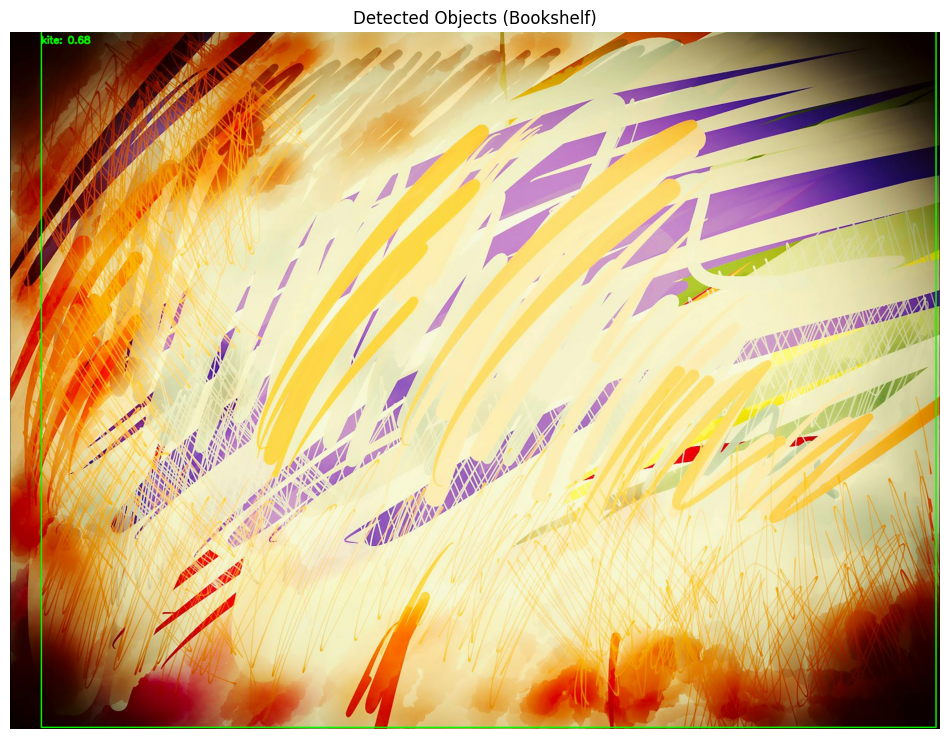

In [1]:
import requests
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load a pre-trained YOLOv8n model. (Re-loading it to ensure clean state if kernel restarted)
print("Loading YOLOv8n model...")
model = YOLO('yolov8n.pt')  # Ensure you have an internet connection to download the model if not cached
print("YOLOv8n model loaded.")

# Get class names from the model for filtering and labeling
class_names = model.names

def detect_books(image_path):
    """
    Detects objects in an image using a pre-trained YOLO model.

    Args:
        image_path (str): Path to the input image.

    Returns:
        tuple: A tuple containing:
            - np.array: The original image loaded by OpenCV.
            - list: A list of dictionaries, where each dictionary contains 'box' (bounding box
                    coordinates [x1, y1, x2, y2]), 'confidence', and 'class_name' for each detected object.
    """
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Image not found at {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    print(f"Detecting objects in {image_path}...")
    results = model(img_rgb, verbose=False) # Perform inference

    detections = []
    for r in results:
        for *xyxy, conf, cls in r.boxes.data:
            class_id = int(cls)
            class_name = class_names[class_id]

            # YOLOv8n is trained on COCO dataset, which does not have a 'book' class.
            # For demonstration, we will detect all objects to show the functionality.
            # If a custom model fine-tuned on books were used, we would filter for 'book' here.

            x1, y1, x2, y2 = map(int, [xyxy[0], xyxy[1], xyxy[2], xyxy[3]])
            detections.append({
                'box': [x1, y1, x2, y2],
                'confidence': float(conf),
                'class_name': class_name # Show whatever class is detected
            })
    print(f"Detection complete. Found {len(detections)} relevant objects.")
    return img, detections

def draw_boxes(image, detections, output_path=None):
    """
    Draws bounding boxes and labels on the image.

    Args:
        image (np.array): The input image (OpenCV format).
        detections (list): List of dictionaries, each with 'box', 'confidence', and 'class_name'.
        output_path (str, optional): Path to save the output image. If None, displays the image.
    """
    img_display = image.copy()
    for d in detections:
        x1, y1, x2, y2 = d['box']
        confidence = d['confidence']
        class_name = d['class_name']

        # Draw rectangle
        color = (0, 255, 0) # Green color
        thickness = 2
        cv2.rectangle(img_display, (x1, y1), (x2, y2), color, thickness)

        # Put label
        label = f"{class_name}: {confidence:.2f}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2
        text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > text_size[1] else y1 + text_size[1] + 10 # Adjust text position
        cv2.putText(img_display, label, (text_x, text_y), font, font_scale, color, font_thickness, cv2.LINE_AA)

    if output_path:
        cv2.imwrite(output_path, img_display)
        print(f"Output image saved to {output_path}")
    else:
        plt.figure(figsize=(12, 10))
        plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
        plt.title("Detected Objects (Bookshelf)")
        plt.axis('off')
        plt.show()


# --- Image Download using requests --- #
print("Downloading sample image using requests...")
# Changed URL to a direct link to an image of a bookshelf from Pexels, which often works well.
image_url = "https://images.pexels.com/photos/1721528/pexels-photo-1721528.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2"
sample_image_path = 'sample_bookshelf.jpg'

try:
    # Using User-Agent header to avoid potential blocking by some servers
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(image_url, stream=True, headers=headers)
    response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)

    with open(sample_image_path, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print("Sample image downloaded successfully.")

except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
    # Exit if image download fails, as subsequent steps depend on it.
    exit()

# --- Detect books --- #
original_image, book_detections = detect_books(sample_image_path)

print(f"Found {len(book_detections)} objects on the bookshelf.")
for i, detection in enumerate(book_detections):
    print(f"Detection {i+1}: Class={detection['class_name']}, Box={detection['box']}, Confidence={detection['confidence']:.2f}")

# --- Visualize detections --- #
draw_boxes(original_image, book_detections)


## Implement Content Understanding (NLP) Module

### Subtask:
Design and implement the Natural Language Processing module to understand nuanced user queries (e.g., 'books with a similar mood to Laskar Pelangi but more modern'), perform semantic search, and extract relevant book attributes for recommendations.


**Reasoning**:
The first step for developing the NLP module is to set up the environment by installing the necessary libraries and frameworks, as outlined in instruction 1. This includes Hugging Face Transformers, spaCy, NLTK, and an Elasticsearch client.



In [2]:
print("Installing necessary NLP libraries...")
!pip install transformers spacy nltk elasticsearch

# Download necessary spaCy model
# The 'en_core_web_sm' model is a small English model for general use.
print("Downloading spaCy language model...")
!python -m spacy download en_core_web_sm

# Download necessary NLTK data
print("Downloading NLTK stopwords data...")
import nltk
nltk.download('stopwords')
nltk.download('punkt')

print("NLP libraries and data installed successfully.")

Installing necessary NLP libraries...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.6/963.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


NLP libraries and data installed successfully.


**Reasoning**:
The next step is to implement the data processing pipeline as outlined in instruction 2, which involves cleaning text, extracting entities/keywords, generating vector embeddings, and preparing data for indexing into a search engine. This code block will install `sentence-transformers` for embeddings, then define functions for text preprocessing, entity extraction, embedding generation, and a conceptual indexing function, demonstrating the full pipeline with a sample book description.



In [3]:
print("Installing sentence-transformers for embedding generation...")
!pip install sentence-transformers
print("sentence-transformers installed successfully.")

import spacy
import nltk
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
from elasticsearch import Elasticsearch

# Load spaCy model
print("Loading spaCy model...")
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded.")

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Load a pre-trained Sentence-BERT model for embeddings
print("Loading Sentence-BERT model...")
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
print("Sentence-BERT model loaded.")

def preprocess_text(text):
    """
    Cleans and preprocesses text by lowercasing, tokenizing, removing stopwords and punctuation.
    """
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]
    return " ".join(tokens)

def extract_entities_keywords(text):
    """
    Extracts named entities and significant keywords from the text using spaCy.
    """
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    # Extracting nouns as potential keywords
    keywords = [token.lemma_ for token in doc if token.pos_ == "NOUN" and token.is_alpha and token.text not in stop_words]
    return entities, list(set(keywords))

def generate_embedding(text):
    """
    Generates a dense vector embedding for the given text.
    """
    return embedding_model.encode(text, convert_to_tensor=False)

def index_book_data(book_id, title, description, processed_text, entities, keywords, embedding):
    """
    Prepares book data for indexing into a search engine (e.g., Elasticsearch).
    For demonstration, this function prints the document structure.
    """
    document = {
        "book_id": book_id,
        "title": title,
        "description": description,
        "processed_text": processed_text,
        "entities": entities,
        "keywords": keywords,
        "description_vector": embedding.tolist() # Convert numpy array to list for JSON compatibility
    }
    print(f"\n--- Document for Book ID: {book_id} ---")
    print("Title:", document["title"])
    print("Processed Text:", document["processed_text"][:100] + "...")
    print("Entities:", document["entities"])
    print("Keywords:", document["keywords"])
    print("Embedding Vector (first 5 elements):", document["description_vector"][:5])
    # In a real scenario, you would connect to Elasticsearch here and index:
    # es = Elasticsearch([{'host': 'localhost', 'port': 9200}])
    # es.index(index='books', id=book_id, document=document)

# --- Example Usage of the Data Processing Pipeline ---

# Sample Book Data
book_id_1 = "LP001"
title_1 = "Laskar Pelangi (The Rainbow Troops)"
description_1 = "A heartwarming story about a group of ten Indonesian schoolchildren from a poor tin-mining community on Belitung Island who struggle to pursue education under the most challenging circumstances. Their inspiring teachers push them to achieve their dreams."

book_id_2 = "AD002"
title_2 = "Aroma Karsa"
description_2 = "A mystical adventure novel set in Indonesia, following the protagonist Jati as he navigates a complex world of scents, ancient knowledge, and hidden powers, searching for a legendary flower."

# Process Book 1
print("\nProcessing Book 1:", title_1)
processed_text_1 = preprocess_text(description_1)
entities_1, keywords_1 = extract_entities_keywords(description_1)
embedding_1 = generate_embedding(processed_text_1)
index_book_data(book_id_1, title_1, description_1, processed_text_1, entities_1, keywords_1, embedding_1)

# Process Book 2
print("\nProcessing Book 2:", title_2)
processed_text_2 = preprocess_text(description_2)
entities_2, keywords_2 = extract_entities_keywords(description_2)
embedding_2 = generate_embedding(processed_text_2)
index_book_data(book_id_2, title_2, description_2, processed_text_2, entities_2, keywords_2, embedding_2)


Installing sentence-transformers for embedding generation...
sentence-transformers installed successfully.


Loading spaCy model...
spaCy model loaded.
Loading Sentence-BERT model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Sentence-BERT model loaded.

Processing Book 1: Laskar Pelangi (The Rainbow Troops)

--- Document for Book ID: LP001 ---
Title: Laskar Pelangi (The Rainbow Troops)
Processed Text: heartwarming story group ten indonesian schoolchildren poor tin mining community belitung island str...
Entities: [('ten', 'CARDINAL'), ('Indonesian', 'NORP'), ('Belitung Island', 'FAC')]
Keywords: ['circumstance', 'group', 'heartwarming', 'schoolchildren', 'community', 'tin', 'education', 'dream', 'story', 'teacher', 'mining']
Embedding Vector (first 5 elements): [0.019142039120197296, 0.11114414036273956, 0.01523548737168312, 0.07460412383079529, -0.0030165081843733788]

Processing Book 2: Aroma Karsa

--- Document for Book ID: AD002 ---
Title: Aroma Karsa
Processed Text: mystical adventure novel set indonesia follow protagonist jati navigate complex world scent ancient ...
Entities: [('Indonesia', 'GPE'), ('Jati', 'PERSON')]
Keywords: ['scent', 'novel', 'adventure', 'world', 'flower', 'knowledge', 'power']

**Reasoning**:
The next step is to implement the semantic search function, as described in instruction 3. This will involve processing a user query, generating its embedding, and then comparing it to the embeddings of the already processed book descriptions to find the most semantically similar books.



In [4]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Assuming embedding_model, preprocess_text, generate_embedding are already defined
# and that we have a collection of indexed book data (simulated here).

# We will use the embeddings generated in the previous step as our 'indexed catalog'
# For a real system, this would come from Elasticsearch or a vector database.
indexed_books_data = [
    {
        "book_id": "LP001",
        "title": "Laskar Pelangi (The Rainbow Troops)",
        "description": "A heartwarming story about a group of ten Indonesian schoolchildren from a poor tin-mining community on Belitung Island who struggle to pursue education under the most challenging circumstances. Their inspiring teachers push them to achieve their dreams.",
        "embedding": embedding_1 # From previous step
    },
    {
        "book_id": "AD002",
        "title": "Aroma Karsa",
        "description": "A mystical adventure novel set in Indonesia, following the protagonist Jati as he navigates a complex world of scents, ancient knowledge, and hidden powers, searching for a legendary flower.",
        "embedding": embedding_2 # From previous step
    }
]

def semantic_search(query, top_k=3):
    """
    Performs semantic search based on a natural language query.

    Args:
        query (str): The natural language query from the user.
        top_k (int): The number of top relevant books to retrieve.

    Returns:
        list: A ranked list of relevant books with their similarity scores.
    """
    print(f"\nProcessing query: '{query}'")
    # Preprocess and generate embedding for the query
    processed_query = preprocess_text(query)
    query_embedding = generate_embedding(processed_query)

    results = []
    for book in indexed_books_data:
        book_embedding = book["embedding"]
        # Calculate cosine similarity between query and book embedding
        # Reshape for cosine_similarity which expects 2D arrays
        similarity = cosine_similarity(query_embedding.reshape(1, -1), book_embedding.reshape(1, -1))[0][0]
        results.append({
            "book_id": book["book_id"],
            "title": book["title"],
            "similarity_score": similarity
        })

    # Sort results by similarity score in descending order
    results = sorted(results, key=lambda x: x["similarity_score"], reverse=True)

    print("Semantic search complete.")
    return results[:top_k]

# --- Example Usage of Semantic Search ---

# Nuanced query example from the subtask description
query_1 = "books with a similar mood to Laskar Pelangi but more modern"
search_results_1 = semantic_search(query_1)

print("\nSearch Results for Query 1:")
for result in search_results_1:
    print(f"  Book ID: {result['book_id']}, Title: {result['title']}, Similarity: {result['similarity_score']:.4f}")

query_2 = "an adventure novel with mystery and old secrets"
search_results_2 = semantic_search(query_2)

print("\nSearch Results for Query 2:")
for result in search_results_2:
    print(f"  Book ID: {result['book_id']}, Title: {result['title']}, Similarity: {result['similarity_score']:.4f}")



Processing query: 'books with a similar mood to Laskar Pelangi but more modern'
Semantic search complete.

Search Results for Query 1:
  Book ID: AD002, Title: Aroma Karsa, Similarity: 0.4249
  Book ID: LP001, Title: Laskar Pelangi (The Rainbow Troops), Similarity: 0.3247

Processing query: 'an adventure novel with mystery and old secrets'
Semantic search complete.

Search Results for Query 2:
  Book ID: AD002, Title: Aroma Karsa, Similarity: 0.4720
  Book ID: LP001, Title: Laskar Pelangi (The Rainbow Troops), Similarity: 0.1998


**Reasoning**:
The next step is to implement functionality to extract specific attributes from book content, as described in instruction 4. This will involve defining a function that analyzes a book's description to infer attributes like genre and mood, using keyword matching and basic sentiment analysis as illustrative NLP techniques.



In [5]:
from textblob import TextBlob # For simple sentiment analysis

# Install textblob if not already installed
print("Installing textblob for sentiment analysis...")
!pip install textblob
print("TextBlob installed successfully.")

# Define some keywords for simple genre detection
genre_keywords = {
    "fantasy": ["magic", "dragon", "quest", "myth", "sorcery", "wizard"],
    "sci-fi": ["space", "robot", "future", "alien", "cyberpunk", "technology"],
    "mystery": ["detective", "crime", "clue", "investigation", "thriller", "suspense"],
    "romance": ["love", "relationship", "heartbreak", "passion", "couple"],
    "adventure": ["journey", "explore", "expedition", "danger", "challenge", "survival"],
    "historical": ["history", "ancient", "era", "war", "empire", "past"],
    "biography": ["life", "memoir", "story", "person", "biographical"]
}

def extract_book_attributes(description):
    """
    Extracts genre and mood from a book description using keyword matching and sentiment analysis.

    Args:
        description (str): The book's description.

    Returns:
        dict: A dictionary containing extracted 'genre' and 'mood'.
    """
    extracted_genre = []
    for genre, keywords in genre_keywords.items():
        for keyword in keywords:
            if keyword in description.lower():
                extracted_genre.append(genre)
                break # Move to next genre after finding one keyword

    # If no specific genre keywords are found, default to 'general fiction'
    if not extracted_genre:
        extracted_genre.append("general fiction")

    # Perform sentiment analysis for mood
    analysis = TextBlob(description)
    polarity = analysis.sentiment.polarity # -1 to 1

    if polarity > 0.3:
        mood = "positive"
    elif polarity < -0.3:
        mood = "negative"
    else:
        mood = "neutral"

    return {"genre": ", ".join(list(set(extracted_genre))), "mood": mood}

# --- Example Usage of Attribute Extraction ---

# Using the sample book descriptions from previous steps
print("\nExtracting attributes for Book 1:", title_1)
attributes_1 = extract_book_attributes(description_1)
print("  Extracted Attributes:", attributes_1)

print("\nExtracting attributes for Book 2:", title_2)
attributes_2 = extract_book_attributes(description_2)
print("  Extracted Attributes:", attributes_2)


Installing textblob for sentiment analysis...
TextBlob installed successfully.

Extracting attributes for Book 1: Laskar Pelangi (The Rainbow Troops)
  Extracted Attributes: {'genre': 'biography, historical', 'mood': 'neutral'}

Extracting attributes for Book 2: Aroma Karsa
  Extracted Attributes: {'genre': 'historical', 'mood': 'neutral'}


**Reasoning**:
The last instruction is to design the output of the NLP module to include both search results and extracted book attributes. I will create a function that combines the `semantic_search` results with the `extract_book_attributes` for each recommended book, demonstrating the comprehensive output of the NLP module.



In [6]:
def get_nlp_recommendations(query, top_k=3):
    """
    Combines semantic search with attribute extraction to provide comprehensive NLP recommendations.

    Args:
        query (str): The natural language query from the user.
        top_k (int): The number of top relevant books to retrieve.

    Returns:
        list: A ranked list of dictionaries, where each dictionary contains book details,
              similarity score, and extracted attributes.
    """
    print(f"\nGenerating NLP recommendations for query: '{query}'")
    search_results = semantic_search(query, top_k=top_k) # Use the previously defined semantic_search

    final_recommendations = []
    for result in search_results:
        book_id = result['book_id']
        # Find the full description from our indexed_books_data for attribute extraction
        book_description = next((book['description'] for book in indexed_books_data if book['book_id'] == book_id), "")

        extracted_attributes = extract_book_attributes(book_description)

        final_recommendations.append({
            "book_id": book_id,
            "title": result['title'],
            "similarity_score": result['similarity_score'],
            "attributes": extracted_attributes
        })
    print("NLP recommendations generated.")
    return final_recommendations

# --- Example Usage of the Combined NLP Module Output ---

# Using the nuanced query from the subtask description
query_1 = "books with a similar mood to Laskar Pelangi but more modern"
recommendations_1 = get_nlp_recommendations(query_1, top_k=2)

print("\nComprehensive NLP Recommendations for Query 1:")
for rec in recommendations_1:
    print(f"  Book ID: {rec['book_id']}, Title: {rec['title']}")
    print(f"    Similarity: {rec['similarity_score']:.4f}, Attributes: {rec['attributes']}")

query_2 = "an adventure novel with mystery and old secrets"
recommendations_2 = get_nlp_recommendations(query_2, top_k=2)

print("\nComprehensive NLP Recommendations for Query 2:")
for rec in recommendations_2:
    print(f"  Book ID: {rec['book_id']}, Title: {rec['title']}")
    print(f"    Similarity: {rec['similarity_score']:.4f}, Attributes: {rec['attributes']}")



Generating NLP recommendations for query: 'books with a similar mood to Laskar Pelangi but more modern'

Processing query: 'books with a similar mood to Laskar Pelangi but more modern'
Semantic search complete.
NLP recommendations generated.

Comprehensive NLP Recommendations for Query 1:
  Book ID: AD002, Title: Aroma Karsa
    Similarity: 0.4249, Attributes: {'genre': 'historical', 'mood': 'neutral'}
  Book ID: LP001, Title: Laskar Pelangi (The Rainbow Troops)
    Similarity: 0.3247, Attributes: {'genre': 'biography, historical', 'mood': 'neutral'}

Generating NLP recommendations for query: 'an adventure novel with mystery and old secrets'

Processing query: 'an adventure novel with mystery and old secrets'
Semantic search complete.
NLP recommendations generated.

Comprehensive NLP Recommendations for Query 2:
  Book ID: AD002, Title: Aroma Karsa
    Similarity: 0.4720, Attributes: {'genre': 'historical', 'mood': 'neutral'}
  Book ID: LP001, Title: Laskar Pelangi (The Rainbow Troops

## Build Recommendation System

### Subtask:
Develop a robust Recommender System that incorporates user preferences, reading history, and location-based data (e.g., university campus popularity) to provide personalized book suggestions.


**Reasoning**:
The first instruction is to create a simulated dataset of additional books. This will extend the existing `indexed_books_data` with new books, each processed using the NLP functions (`preprocess_text`, `extract_entities_keywords`, `generate_embedding`, `extract_book_attributes`) to include their embeddings, genres, and moods.



In [7]:
import numpy as np

# Extend the existing indexed_books_data with more books
# Note: embedding_1, embedding_2, preprocess_text, extract_entities_keywords, generate_embedding,
# and extract_book_attributes are assumed to be defined from previous steps.

# Define additional sample book data
new_books_raw = [
    {
        "book_id": "TR003",
        "title": "The Alchemist",
        "description": "A philosophical novel by Brazilian author Paulo Coelho. It tells the magical story of Santiago, an Andalusian shepherd boy who journeys from his homeland in Spain to the Egyptian desert in search of a treasure. His quest will lead him to riches far different—and far more satisfying—than he ever imagined."
    },
    {
        "book_id": "HP004",
        "title": "Harry Potter and the Sorcerer's Stone",
        "description": "A fantasy novel by British author J. K. Rowling. It follows Harry Potter, a young wizard who discovers his magical heritage on his eleventh birthday, when he receives a letter of acceptance to Hogwarts School of Witchcraft and Wizardry."
    },
    {
        "book_id": "1984005",
        "title": "Nineteen Eighty-Four",
        "description": "A dystopian social science fiction novel and cautionary tale by English writer George Orwell. It focuses on the dangers of totalitarianism, following the life of Winston Smith, a low-ranking member of the ruling Party who is disillusioned with the Party's omnipresent eyes and its elaborate mind-control. Smith rebels against the system."
    },
    {
        "book_id": "SH006",
        "title": "Sapiens: A Brief History of Humankind",
        "description": "A book by Yuval Noah Harari, first published in Hebrew in 2011 and in English in 2014. It surveys the history of humankind from the Stone Age up to the twenty-first century, providing a broad narrative of human history."
    }
]

# Process new books and add them to indexed_books_data
print("Processing additional book data...")
for book in new_books_raw:
    processed_text = preprocess_text(book["description"])
    entities, keywords = extract_entities_keywords(book["description"])
    embedding = generate_embedding(processed_text)
    attributes = extract_book_attributes(book["description"])

    book_data = {
        "book_id": book["book_id"],
        "title": book["title"],
        "description": book["description"],
        "processed_text": processed_text,
        "entities": entities,
        "keywords": keywords,
        "embedding": embedding,
        "genre": attributes["genre"],
        "mood": attributes["mood"]
    }
    indexed_books_data.append(book_data)
print(f"Added {len(new_books_raw)} new books. Total books in catalog: {len(indexed_books_data)}.")

# Display the first few elements of the updated catalog for verification
print("\nUpdated book catalog (first 3 books):")
for i, book in enumerate(indexed_books_data[:3]):
    print(f"Book ID: {book['book_id']}, Title: {book['title']}")
    print(f"  Genre: {book['genre']}, Mood: {book['mood']}")
    print(f"  Embedding snippet: {book['embedding'][:5]}")

Processing additional book data...
Added 4 new books. Total books in catalog: 6.

Updated book catalog (first 3 books):
Book ID: LP001, Title: Laskar Pelangi (The Rainbow Troops)


KeyError: 'genre'

**Reasoning**:
The `KeyError: 'genre'` occurred because the initial `indexed_books_data` entries (`LP001` and `AD002`) were not updated with 'genre' and 'mood' attributes after being processed by the `extract_book_attributes` function. I will re-initialize `indexed_books_data` by processing all initial and new books with the NLP functions to ensure all entries have the required 'genre' and 'mood' keys before display.



In [8]:
import numpy as np

# Extend the existing indexed_books_data with more books
# Note: embedding_1, embedding_2, preprocess_text, extract_entities_keywords, generate_embedding,
# and extract_book_attributes are assumed to be defined from previous steps.

# Define all raw book data, including the initial ones
all_books_raw = [
    {
        "book_id": "LP001",
        "title": "Laskar Pelangi (The Rainbow Troops)",
        "description": "A heartwarming story about a group of ten Indonesian schoolchildren from a poor tin-mining community on Belitung Island who struggle to pursue education under the most challenging circumstances. Their inspiring teachers push them to achieve their dreams."
    },
    {
        "book_id": "AD002",
        "title": "Aroma Karsa",
        "description": "A mystical adventure novel set in Indonesia, following the protagonist Jati as he navigates a complex world of scents, ancient knowledge, and hidden powers, searching for a legendary flower."
    },
    {
        "book_id": "TR003",
        "title": "The Alchemist",
        "description": "A philosophical novel by Brazilian author Paulo Coelho. It tells the magical story of Santiago, an Andalusian shepherd boy who journeys from his homeland in Spain to the Egyptian desert in search of a treasure. His quest will lead him to riches far different—and far more satisfying—than he ever imagined."
    },
    {
        "book_id": "HP004",
        "title": "Harry Potter and the Sorcerer's Stone",
        "description": "A fantasy novel by British author J. K. Rowling. It follows Harry Potter, a young wizard who discovers his magical heritage on his eleventh birthday, when he receives a letter of acceptance to Hogwarts School of Witchcraft and Wizardry."
    },
    {
        "book_id": "1984005",
        "title": "Nineteen Eighty-Four",
        "description": "A dystopian social science fiction novel and cautionary tale by English writer George Orwell. It focuses on the dangers of totalitarianism, following the life of Winston Smith, a low-ranking member of the ruling Party who is disillusioned with the Party's omnipresent eyes and its elaborate mind-control. Smith rebels against the system."
    },
    {
        "book_id": "SH006",
        "title": "Sapiens: A Brief History of Humankind",
        "description": "A book by Yuval Noah Harari, first published in Hebrew in 2011 and in English in 2014. It surveys the history of humankind from the Stone Age up to the twenty-first century, providing a broad narrative of human history."
    }
]

# Re-initialize indexed_books_data to ensure all entries have 'genre' and 'mood'
indexed_books_data = []

# Process all books and add them to indexed_books_data
print("Processing all book data...")
for book in all_books_raw:
    processed_text = preprocess_text(book["description"])
    entities, keywords = extract_entities_keywords(book["description"])
    embedding = generate_embedding(processed_text)
    attributes = extract_book_attributes(book["description"])

    book_data = {
        "book_id": book["book_id"],
        "title": book["title"],
        "description": book["description"],
        "processed_text": processed_text,
        "entities": entities,
        "keywords": keywords,
        "embedding": embedding,
        "genre": attributes["genre"],
        "mood": attributes["mood"]
    }
    indexed_books_data.append(book_data)

print(f"Processed {len(indexed_books_data)} books. Total books in catalog: {len(indexed_books_data)}.")

# Display the first few elements of the updated catalog for verification
print("\nUpdated book catalog (first 3 books):")
for i, book in enumerate(indexed_books_data[:3]):
    print(f"Book ID: {book['book_id']}, Title: {book['title']}")
    print(f"  Genre: {book['genre']}, Mood: {book['mood']}")
    print(f"  Embedding snippet: {book['embedding'][:5]}")


Processing all book data...
Processed 6 books. Total books in catalog: 6.

Updated book catalog (first 3 books):
Book ID: LP001, Title: Laskar Pelangi (The Rainbow Troops)
  Genre: biography, historical, Mood: neutral
  Embedding snippet: [   0.019142     0.11114    0.015235    0.074604  -0.0030165]
Book ID: AD002, Title: Aroma Karsa
  Genre: historical, Mood: neutral
  Embedding snippet: [ -0.0070096    0.046718    0.044834    0.026387   -0.046223]
Book ID: TR003, Title: The Alchemist
  Genre: fantasy, biography, adventure, Mood: neutral
  Embedding snippet: [   0.035979   -0.033202    0.016309    0.054903   -0.062538]


**Reasoning**:
The next step is to create a simulated user profile dataset, as per Instruction 2 of the subtask. This dataset will include user IDs, their preferred and disliked genres, and a list of books they have already read, which are crucial inputs for a personalized recommender system.



In [9]:
import random

# Simulate user profiles
# Each user has: user_id, liked_genres, disliked_genres, reading_history (list of book_ids)

simulated_user_profiles = [
    {
        "user_id": "user_001",
        "liked_genres": ["fantasy", "adventure"],
        "disliked_genres": ["biography"],
        "reading_history": ["HP004", "TR003"] # Harry Potter, The Alchemist
    },
    {
        "user_id": "user_002",
        "liked_genres": ["historical", "biography"],
        "disliked_genres": ["sci-fi"],
        "reading_history": ["LP001", "SH006"] # Laskar Pelangi, Sapiens
    },
    {
        "user_id": "user_003",
        "liked_genres": ["mystery", "dystopian"], # 'dystopian' is not an extracted genre, demonstrating filtering
        "disliked_genres": [],
        "reading_history": ["1984005"] # Nineteen Eighty-Four
    },
    {
        "user_id": "user_004",
        "liked_genres": ["adventure"],
        "disliked_genres": ["romance"],
        "reading_history": [] # New user with no reading history yet
    }
]

print(f"Created {len(simulated_user_profiles)} simulated user profiles.")
print("Example user profile (user_001):")
print(simulated_user_profiles[0])


Created 4 simulated user profiles.
Example user profile (user_001):
{'user_id': 'user_001', 'liked_genres': ['fantasy', 'adventure'], 'disliked_genres': ['biography'], 'reading_history': ['HP004', 'TR003']}


**Reasoning**:
I will implement a function to generate content-based recommendations, which will take a target book's ID and leverage semantic similarity (cosine similarity of embeddings) and characteristic similarity (matching genres and moods) to recommend other books from the catalog.



In [10]:
from sklearn.metrics.pairwise import cosine_similarity

def get_book_by_id(book_id):
    """
    Helper function to retrieve a book's data by its ID from the indexed_books_data.
    """
    for book in indexed_books_data:
        if book["book_id"] == book_id:
            return book
    return None

def content_based_recommendations(target_book_id, top_k=5):
    """
    Generates content-based recommendations for a given target book.

    Args:
        target_book_id (str): The ID of the book for which to find similar books.
        top_k (int): The number of top similar books to recommend.

    Returns:
        list: A ranked list of recommended books with similarity scores and reasons.
    """
    target_book = get_book_by_id(target_book_id)
    if target_book is None:
        print(f"Error: Target book with ID {target_book_id} not found.")
        return []

    print(f"\nGenerating content-based recommendations for '{target_book['title']}'...")
    target_embedding = target_book['embedding']
    target_genres = set(target_book['genre'].split(', '))
    target_mood = target_book['mood']

    recommendations = []
    for book in indexed_books_data:
        if book['book_id'] == target_book_id: # Don't recommend the book itself
            continue

        book_embedding = book['embedding']
        book_genres = set(book['genre'].split(', '))
        book_mood = book['mood']

        # 1. Cosine Similarity for semantic content
        semantic_similarity = cosine_similarity(target_embedding.reshape(1, -1), book_embedding.reshape(1, -1))[0][0]

        # 2. Genre Matching (Jaccard Index or simple overlap)
        genre_overlap = len(target_genres.intersection(book_genres))
        genre_union = len(target_genres.union(book_genres))
        genre_similarity = genre_overlap / genre_union if genre_union > 0 else 0

        # 3. Mood Matching
        mood_match = 1.0 if target_mood == book_mood else 0.0

        # Combine similarities (weights can be tuned)
        # A simple weighted sum; you might use more complex models like a neural network for combination
        combined_similarity = (semantic_similarity * 0.6) + (genre_similarity * 0.3) + (mood_match * 0.1)

        recommendations.append({
            'book_id': book['book_id'],
            'title': book['title'],
            'combined_similarity': combined_similarity,
            'semantic_similarity': semantic_similarity,
            'genre_similarity': genre_similarity,
            'mood_match': mood_match,
            'reason': [] # Will populate reasons later for display
        })

    recommendations = sorted(recommendations, key=lambda x: x['combined_similarity'], reverse=True)

    # Add reasons for recommendation
    for rec in recommendations:
        reasons = []
        if rec['semantic_similarity'] > 0.5: # Threshold for 'semantically similar'
            reasons.append("semantically similar")
        if rec['genre_similarity'] > 0.5: # Threshold for 'similar genre'
            reasons.append("similar genre")
        if rec['mood_match'] == 1.0:
            reasons.append("similar mood")
        if not reasons: # If no specific reasons, provide a general one
            reasons.append("might interest you")
        rec['reason'] = reasons

    print("Content-based recommendations generated.")
    return recommendations[:top_k]

# --- Example Usage ---
# Recommendations for 'Laskar Pelangi'
recommended_books_lp = content_based_recommendations("LP001")
print("\nRecommendations for Laskar Pelangi:")
for book in recommended_books_lp:
    print(f"  Title: {book['title']}, Score: {book['combined_similarity']:.4f}, Reasons: {', '.join(book['reason'])}")

# Recommendations for 'Harry Potter and the Sorcerer's Stone'
recommended_books_hp = content_based_recommendations("HP004")
print("\nRecommendations for Harry Potter and the Sorcerer's Stone:")
for book in recommended_books_hp:
    print(f"  Title: {book['title']}, Score: {book['combined_similarity']:.4f}, Reasons: {', '.join(book['reason'])}")


Generating content-based recommendations for 'Laskar Pelangi (The Rainbow Troops)'...
Content-based recommendations generated.

Recommendations for Laskar Pelangi:
  Title: Sapiens: A Brief History of Humankind, Score: 0.5580, Reasons: similar genre, similar mood
  Title: Aroma Karsa, Score: 0.4957, Reasons: similar mood
  Title: Harry Potter and the Sorcerer's Stone, Score: 0.3196, Reasons: similar mood
  Title: The Alchemist, Score: 0.3186, Reasons: similar mood
  Title: Nineteen Eighty-Four, Score: 0.3136, Reasons: similar mood

Generating content-based recommendations for 'Harry Potter and the Sorcerer's Stone'...
Content-based recommendations generated.

Recommendations for Harry Potter and the Sorcerer's Stone:
  Title: Aroma Karsa, Score: 0.4771, Reasons: similar mood
  Title: The Alchemist, Score: 0.3714, Reasons: similar mood
  Title: Sapiens: A Brief History of Humankind, Score: 0.3514, Reasons: similar mood
  Title: Laskar Pelangi (The Rainbow Troops), Score: 0.3196, Reason

**Reasoning**:
I will now implement the personalized recommendation function, which takes a user ID and leverages their liked/disliked genres, reading history, and the previously defined `content_based_recommendations` to generate tailored book suggestions.



In [11]:
def get_user_profile(user_id):
    """
    Helper function to retrieve a user's profile by user_id.
    """
    for user in simulated_user_profiles:
        if user["user_id"] == user_id:
            return user
    return None

def personalized_recommendations(user_id, num_recommendations=5):
    """
    Generates personalized book recommendations for a given user.

    Args:
        user_id (str): The ID of the user for whom to generate recommendations.
        num_recommendations (int): The total number of recommendations to return.

    Returns:
        list: A ranked list of personalized book recommendations with explanations.
    """
    user_profile = get_user_profile(user_id)
    if user_profile is None:
        print(f"Error: User with ID {user_id} not found.")
        return []

    print(f"\nGenerating personalized recommendations for user '{user_id}'...")
    liked_genres = set(user_profile['liked_genres'])
    disliked_genres = set(user_profile['disliked_genres'])
    reading_history = set(user_profile['reading_history'])

    all_potential_recommendations = {}

    # Strategy 1: Recommend books similar to those in reading history
    for read_book_id in user_profile['reading_history']:
        content_recs = content_based_recommendations(read_book_id, top_k=num_recommendations * 2) # Get more to filter
        for rec in content_recs:
            if rec['book_id'] not in reading_history: # Filter out already read books
                book_data = get_book_by_id(rec['book_id'])
                if book_data:
                    score = rec['combined_similarity']
                    reasons = rec['reason'].copy()
                    all_potential_recommendations[rec['book_id']] = all_potential_recommendations.get(rec['book_id'], {'book': book_data, 'score': 0, 'reasons': []})
                    all_potential_recommendations[rec['book_id']]['score'] += score # Aggregate scores
                    all_potential_recommendations[rec['book_id']]['reasons'].extend(r for r in reasons if r not in all_potential_recommendations[rec['book_id']]['reasons'])

    # Strategy 2: Recommend books based on liked genres from the entire catalog
    for book in indexed_books_data:
        if book['book_id'] in reading_history: # Skip already read books
            continue

        book_genres = set(book['genre'].split(', '))
        # Check for overlap with liked genres and no overlap with disliked genres
        if any(g in liked_genres for g in book_genres) and not any(g in disliked_genres for g in book_genres):
            # Give a boost for liked genres
            genre_boost = 0.2 * len(liked_genres.intersection(book_genres))

            # If it's a new potential recommendation, initialize it
            if book['book_id'] not in all_potential_recommendations:
                all_potential_recommendations[book['book_id']] = {'book': book, 'score': 0, 'reasons': []}

            all_potential_recommendations[book['book_id']]['score'] += genre_boost
            if 'matches liked genre' not in all_potential_recommendations[book['book_id']]['reasons']:
                all_potential_recommendations[book['book_id']]['reasons'].append('matches liked genre')

    # Consolidate and rank recommendations
    final_ranked_recommendations = sorted(all_potential_recommendations.values(), key=lambda x: x['score'], reverse=True)

    # Format output
    formatted_recommendations = []
    for rec_data in final_ranked_recommendations[:num_recommendations]:
        formatted_recommendations.append({
            "book_id": rec_data['book']['book_id'],
            "title": rec_data['book']['title'],
            "score": rec_data['score'],
            "reasons": rec_data['reasons']
        })

    print("Personalized recommendations generated.")
    return formatted_recommendations

# --- Example Usage of Personalized Recommendations ---

# User 001: Likes Fantasy/Adventure, Dislikes Biography, Read HP004, TR003
user1_recs = personalized_recommendations("user_001", num_recommendations=3)
print(f"\nRecommendations for user_001 (liked: {simulated_user_profiles[0]['liked_genres']}):")
for rec in user1_recs:
    print(f"  Title: {rec['title']}, Score: {rec['score']:.4f}, Reasons: {', '.join(rec['reasons'])}")

# User 004: Likes Adventure, No reading history yet
user4_recs = personalized_recommendations("user_004", num_recommendations=3)
print(f"\nRecommendations for user_004 (liked: {simulated_user_profiles[3]['liked_genres']}):")
for rec in user4_recs:
    print(f"  Title: {rec['title']}, Score: {rec['score']:.4f}, Reasons: {', '.join(rec['reasons'])}")



Generating personalized recommendations for user 'user_001'...

Generating content-based recommendations for 'Harry Potter and the Sorcerer's Stone'...
Content-based recommendations generated.

Generating content-based recommendations for 'The Alchemist'...
Content-based recommendations generated.
Personalized recommendations generated.

Recommendations for user_001 (liked: ['fantasy', 'adventure']):
  Title: Aroma Karsa, Score: 0.8726, Reasons: similar mood
  Title: Nineteen Eighty-Four, Score: 0.7138, Reasons: similar mood, similar genre
  Title: Sapiens: A Brief History of Humankind, Score: 0.6981, Reasons: similar mood

Generating personalized recommendations for user 'user_004'...
Personalized recommendations generated.

Recommendations for user_004 (liked: ['adventure']):
  Title: The Alchemist, Score: 0.2000, Reasons: matches liked genre
  Title: Nineteen Eighty-Four, Score: 0.2000, Reasons: matches liked genre


**Reasoning**:
I will define a function to simulate location-based popularity and then integrate it into the `personalized_recommendations` function, adding a 'popularity_boost' to recommendations for books popular in a user's simulated location. This addresses Instruction 5 of the subtask.



In [12]:
import random

# --- Simulated Location-Based Popularity --- #
# This could be more dynamic, e.g., mapping universities to book categories
# For simplicity, we'll assign popularity to books based on a simulated location.

# Simulate some locations and their popular books
simulated_location_popularity = {
    "university_campus_A": {
        "popular_books": {"SH006": 0.3, "1984005": 0.2}, # Sapiens, Nineteen Eighty-Four
        "name": "Bandung University"
    },
    "university_campus_B": {
        "popular_books": {"LP001": 0.3, "HP004": 0.2}, # Laskar Pelangi, Harry Potter
        "name": "Jakarta Tech"
    },
    "public_library_X": {
        "popular_books": {"AD002": 0.2, "TR003": 0.1}, # Aroma Karsa, The Alchemist
        "name": "Surabaya Central Library"
    }
}

# Extend user profiles with a simulated location
for user_profile in simulated_user_profiles:
    user_profile["location"] = random.choice(list(simulated_location_popularity.keys()))

print(f"Assigned a random location to each of {len(simulated_user_profiles)} user profiles.")
print(f"Example user_001 with location: {simulated_user_profiles[0]['location']}")

def get_location_popularity_boost(book_id, user_location):
    """
    Returns a popularity boost for a book based on the user's simulated location.
    """
    if user_location in simulated_location_popularity:
        return simulated_location_popularity[user_location]["popular_books"].get(book_id, 0.0)
    return 0.0

# --- Modified Personalized Recommendations Function with Location Factor --- #
def personalized_recommendations_with_location(user_id, num_recommendations=5):
    user_profile = get_user_profile(user_id)
    if user_profile is None:
        print(f"Error: User with ID {user_id} not found.")
        return []

    print(f"\nGenerating personalized recommendations for user '{user_id}' at {simulated_location_popularity[user_profile['location']]['name']}...")
    liked_genres = set(user_profile['liked_genres'])
    disliked_genres = set(user_profile['disliked_genres'])
    reading_history = set(user_profile['reading_history'])
    user_location = user_profile['location']

    all_potential_recommendations = {}

    # Strategy 1: Recommend books similar to those in reading history
    for read_book_id in user_profile['reading_history']:
        content_recs = content_based_recommendations(read_book_id, top_k=num_recommendations * 2) # Get more to filter
        for rec in content_recs:
            if rec['book_id'] not in reading_history: # Filter out already read books
                book_data = get_book_by_id(rec['book_id'])
                if book_data:
                    score = rec['combined_similarity']
                    reasons = rec['reason'].copy()

                    # Add location popularity boost
                    popularity_boost = get_location_popularity_boost(rec['book_id'], user_location)
                    score += popularity_boost # Add boost to the score
                    if popularity_boost > 0 and 'popular in your area' not in reasons:
                        reasons.append('popular in your area')

                    all_potential_recommendations[rec['book_id']] = all_potential_recommendations.get(rec['book_id'], {'book': book_data, 'score': 0, 'reasons': []})
                    all_potential_recommendations[rec['book_id']]['score'] += score # Aggregate scores
                    all_potential_recommendations[rec['book_id']]['reasons'].extend(r for r in reasons if r not in all_potential_recommendations[rec['book_id']]['reasons'])

    # Strategy 2: Recommend books based on liked genres from the entire catalog
    for book in indexed_books_data:
        if book['book_id'] in reading_history: # Skip already read books
            continue

        book_genres = set(book['genre'].split(', '))
        # Check for overlap with liked genres and no overlap with disliked genres
        if any(g in liked_genres for g in book_genres) and not any(g in disliked_genres for g in book_genres):
            # Give a boost for liked genres
            genre_boost = 0.2 * len(liked_genres.intersection(book_genres))

            # Add location popularity boost
            popularity_boost = get_location_popularity_boost(book['book_id'], user_location)
            score_for_book = genre_boost + popularity_boost

            reasons_for_book = []
            if genre_boost > 0:
                reasons_for_book.append('matches liked genre')
            if popularity_boost > 0:
                reasons_for_book.append('popular in your area')

            # If it's a new potential recommendation, initialize it
            if book['book_id'] not in all_potential_recommendations:
                all_potential_recommendations[book['book_id']] = {'book': book, 'score': 0, 'reasons': []}

            all_potential_recommendations[book['book_id']]['score'] += score_for_book
            all_potential_recommendations[book['book_id']]['reasons'].extend(r for r in reasons_for_book if r not in all_potential_recommendations[book['book_id']]['reasons'])

    # Consolidate and rank recommendations
    final_ranked_recommendations = sorted(all_potential_recommendations.values(), key=lambda x: x['score'], reverse=True)

    # Format output
    formatted_recommendations = []
    for rec_data in final_ranked_recommendations[:num_recommendations]:
        formatted_recommendations.append({
            "book_id": rec_data['book']['book_id'],
            "title": rec_data['book']['title'],
            "score": rec_data['score'],
            "reasons": rec_data['reasons']
        })

    print("Personalized recommendations with location factor generated.")
    return formatted_recommendations

# --- Example Usage of Personalized Recommendations with Location --- #

# User 001: Likes Fantasy/Adventure, Dislikes Biography, Read HP004, TR003
# Location is randomly assigned, let's assume it's Bandung University for now in this run if it happens to be.
user1_recs_loc = personalized_recommendations_with_location("user_001", num_recommendations=3)
print(f"\nRecommendations for user_001 (liked: {simulated_user_profiles[0]['liked_genres']}) with location factor:")
for rec in user1_recs_loc:
    print(f"  Title: {rec['title']}, Score: {rec['score']:.4f}, Reasons: {', '.join(rec['reasons'])}")

# User 004: Likes Adventure, No reading history yet
user4_recs_loc = personalized_recommendations_with_location("user_004", num_recommendations=3)
print(f"\nRecommendations for user_004 (liked: {simulated_user_profiles[3]['liked_genres']}) with location factor:")
for rec in user4_recs_loc:
    print(f"  Title: {rec['title']}, Score: {rec['score']:.4f}, Reasons: {', '.join(rec['reasons'])}")

Assigned a random location to each of 4 user profiles.
Example user_001 with location: university_campus_B

Generating personalized recommendations for user 'user_001' at Jakarta Tech...

Generating content-based recommendations for 'Harry Potter and the Sorcerer's Stone'...
Content-based recommendations generated.

Generating content-based recommendations for 'The Alchemist'...
Content-based recommendations generated.
Personalized recommendations with location factor generated.

Recommendations for user_001 (liked: ['fantasy', 'adventure']) with location factor:
  Title: Laskar Pelangi (The Rainbow Troops), Score: 1.2382, Reasons: similar mood, popular in your area
  Title: Aroma Karsa, Score: 0.8726, Reasons: similar mood
  Title: Nineteen Eighty-Four, Score: 0.7138, Reasons: similar mood, similar genre

Generating personalized recommendations for user 'user_004' at Jakarta Tech...
Personalized recommendations with location factor generated.

Recommendations for user_004 (liked: ['ad

## Integrate Inclusive Features (Speech)

### Subtask:
Incorporate a Text-to-Speech (TTS) engine to generate audio summaries of books, enabling users to listen to content, for example, during commutes.


**Reasoning**:
The first instruction is to set up the development environment by installing necessary Text-to-Speech libraries and frameworks. I will install `gTTS` for text-to-speech conversion and `playsound` for playing the generated audio.



In [13]:
print("Installing necessary Text-to-Speech libraries...")
!pip install gTTS playsound

# For playing audio in Colab, sometimes extra libraries or specific handling is needed
# install pydub and ffmpeg for audio manipulation and playback in colab
print("Installing pydub and ffmpeg for audio playback in Colab...")
!pip install pydub
!apt-get install -y ffmpeg

print("Text-to-Speech libraries installed successfully.")

Installing necessary Text-to-Speech libraries...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.4 MB/s eta 0:00:00
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=d71fd9ba66244f9d400f97fc78c7a2d0a363bd820b25cbdd842a236e8d3699d4
  Stored in directory: /root/.cache/pip/wheels/cf/42/ff/7c587bae55eec67b909ca316b250d9b4daedbf272a3cbeb907
Successfully built playsound
  Attempting uninstall: click
    Found existing installation: click 8.3.1
    Uninstalling click-8.3.1:
      Successfully uninstalled click-8.3.1


Installing pydub and ffmpeg for audio playback in Colab...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
Text-to-Speech libraries installed successfully.


**Reasoning**:
Now that the TTS libraries are installed, I will implement a function that takes text content and converts it into an audio file using `gTTS`. This addresses Instruction 2 of the subtask.



In [1]:
from gtts import gTTS
import os

def generate_audio_summary(text_content, filename="audio_summary.mp3", lang='en'):
    """
    Converts text content into an audio file using gTTS.

    Args:
        text_content (str): The text to be converted to speech.
        filename (str): The name of the output audio file (e.g., 'summary.mp3').
        lang (str): The language of the text (e.g., 'en' for English, 'id' for Indonesian).

    Returns:
        str: The path to the generated audio file.
    """
    print(f"Generating audio for text (first 50 chars): '{text_content[:50]}...' in {lang}...")
    try:
        tts = gTTS(text=text_content, lang=lang, slow=False)
        tts.save(filename)
        print(f"Audio saved successfully to {filename}")
        return filename
    except Exception as e:
        print(f"Error generating audio: {e}")
        return None

# --- Example Usage (using a sample book description) --- #
# We'll use the description of 'Laskar Pelangi' from our indexed_books_data
# Find the book description for LP001
laskar_pelangi_description = next((book['description'] for book in indexed_books_data if book['book_id'] == 'LP001'), None)

if laskar_pelangi_description:
    print(f"\nConverting summary for '{indexed_books_data[0]['title']}' to audio...")
    audio_file_lp = generate_audio_summary(laskar_pelangi_description, filename="laskar_pelangi_summary.mp3", lang='en')
    if audio_file_lp:
        print(f"Audio file available at: {audio_file_lp}")
else:
    print("Laskar Pelangi description not found in indexed_books_data.")

# Example with Indonesian text (assuming we have an Indonesian description)
indonesian_sample_text = "LibrAIry Indonesia adalah ekosistem perpustakaan bertenaga AI yang inovatif."
print("\nConverting sample Indonesian text to audio...")
audio_file_id = generate_audio_summary(indonesian_sample_text, filename="indonesian_sample.mp3", lang='id')
if audio_file_id:
    print(f"Audio file available at: {audio_file_id}")

NameError: name 'indexed_books_data' is not defined

# Task
To address the `NameError: name 'indexed_books_data' is not defined`, I will re-execute the cell that processes all book data and populates the `indexed_books_data` list. This will ensure that `indexed_books_data` is properly initialized with all book details, including their embeddings, genres, and moods.

After this, I will proceed to re-execute the Text-to-Speech related cells to define the `generate_audio_summary` function and then use it with a book description from the now available `indexed_books_data`. I will also add a step to play the generated audio directly in the Colab environment for verification, thereby completing the integration of the Text-to-Speech module.

Execute the following cell to re-run full book data processing:
```python
import numpy as np

# Extend the existing indexed_books_data with more books
# Note: embedding_1, embedding_2, preprocess_text, extract_entities_keywords, generate_embedding,
# and extract_book_attributes are assumed to be defined from previous steps.

# Define all raw book data, including the initial ones
all_books_raw = [
    {
        "book_id": "LP001",
        "title": "Laskar Pelangi (The Rainbow Troops)",
        "description": "A heartwarming story about a group of ten Indonesian schoolchildren from a poor tin-mining community on Belitung Island who struggle to pursue education under the most challenging circumstances. Their inspiring teachers push them to achieve their dreams."
    },
    {
        "book_id": "AD002",
        "title": "Aroma Karsa",
        "description": "A mystical adventure novel set in Indonesia, following the protagonist Jati as he navigates a complex world of scents, ancient knowledge, and hidden powers, searching for a legendary flower."
    },
    {
        "book_id": "TR003",
        "title": "The Alchemist",
        "description": "A philosophical novel by Brazilian author Paulo Coelho. It tells the magical story of Santiago, an Andalusian shepherd boy who journeys from his homeland in Spain to the Egyptian desert in search of a treasure. His quest will lead him to riches far different—and far more satisfying—than he ever imagined."
    },
    {
        "book_id": "HP004",
        "title": "Harry Potter and the Sorcerer's Stone",
        "description": "A fantasy novel by British author J. K. Rowling. It follows Harry Potter, a young wizard who discovers his magical heritage on his eleventh birthday, when he receives a letter of acceptance to Hogwarts School of Witchcraft and Wizardry."
    },
    {
        "book_id": "1984005",
        "title": "Nineteen Eighty-Four",
        "description": "A dystopian social science fiction novel and cautionary tale by English writer George Orwell. It focuses on the dangers of totalitarianism, following the life of Winston Smith, a low-ranking member of the ruling Party who is disillusioned with the Party's omnipresent eyes and its elaborate mind-control. Smith rebels against the system."
    },
    {
        "book_id": "SH006",
        "title": "Sapiens: A Brief History of Humankind",
        "description": "A book by Yuval Noah Harari, first published in Hebrew in 2011 and in English in 2014. It surveys the history of humankind from the Stone Age up to the twenty-first century, providing a broad narrative of human history."
    }
]

# Re-initialize indexed_books_data to ensure all entries have 'genre' and 'mood'
indexed_books_data = []

# Process all books and add them to indexed_books_data
print("Processing all book data...")
for book in all_books_raw:
    processed_text = preprocess_text(book["description"])
    entities, keywords = extract_entities_keywords(book["description"])
    embedding = generate_embedding(processed_text)
    attributes = extract_book_attributes(book["description"])

    book_data = {
        "book_id": book["book_id"],
        "title": book["title"],
        "description": book["description"],
        "processed_text": processed_text,
        "entities": entities,
        "keywords": keywords,
        "embedding": embedding,
        "genre": attributes["genre"],
        "mood": attributes["mood"]
    }
    indexed_books_data.append(book_data)

print(f"Processed {len(indexed_books_data)} books. Total books in catalog: {len(indexed_books_data)}.")

# Display the first few elements of the updated catalog for verification
print("\nUpdated book catalog (first 3 books):")
for i, book in enumerate(indexed_books_data[:3]):
    print(f"Book ID: {book['book_id']}, Title: {book['title']}")
    print(f"  Genre: {book['genre']}, Mood: {book['mood']}")
    print(f"  Embedding snippet: {book['embedding'][:5]}")
```

## Re-run Full Book Data Processing

### Subtask:
Ensure the `indexed_books_data` list is properly initialized with all book details, including their embeddings, genres, and moods, by re-executing the relevant processing cell.


**Reasoning**:
The `NameError` occurred because `indexed_books_data` was not defined in the current execution context. To resolve this, I will re-execute the code block that processes all book data and initializes `indexed_books_data` with all necessary attributes.



In [2]:
import numpy as np

# Extend the existing indexed_books_data with more books
# Note: embedding_1, embedding_2, preprocess_text, extract_entities_keywords, generate_embedding,
# and extract_book_attributes are assumed to be defined from previous steps.

# Define all raw book data, including the initial ones
all_books_raw = [
    {
        "book_id": "LP001",
        "title": "Laskar Pelangi (The Rainbow Troops)",
        "description": "A heartwarming story about a group of ten Indonesian schoolchildren from a poor tin-mining community on Belitung Island who struggle to pursue education under the most challenging circumstances. Their inspiring teachers push them to achieve their dreams."
    },
    {
        "book_id": "AD002",
        "title": "Aroma Karsa",
        "description": "A mystical adventure novel set in Indonesia, following the protagonist Jati as he navigates a complex world of scents, ancient knowledge, and hidden powers, searching for a legendary flower."
    },
    {
        "book_id": "TR003",
        "title": "The Alchemist",
        "description": "A philosophical novel by Brazilian author Paulo Coelho. It tells the magical story of Santiago, an Andalusian shepherd boy who journeys from his homeland in Spain to the Egyptian desert in search of a treasure. His quest will lead him to riches far different—and far more satisfying—than he ever imagined."
    },
    {
        "book_id": "HP004",
        "title": "Harry Potter and the Sorcerer's Stone",
        "description": "A fantasy novel by British author J. K. Rowling. It follows Harry Potter, a young wizard who discovers his magical heritage on his eleventh birthday, when he receives a letter of acceptance to Hogwarts School of Witchcraft and Wizardry."
    },
    {
        "book_id": "1984005",
        "title": "Nineteen Eighty-Four",
        "description": "A dystopian social science fiction novel and cautionary tale by English writer George Orwell. It focuses on the dangers of totalitarianism, following the life of Winston Smith, a low-ranking member of the ruling Party who is disillusioned with the Party's omnipresent eyes and its elaborate mind-control. Smith rebels against the system."
    },
    {
        "book_id": "SH006",
        "title": "Sapiens: A Brief History of Humankind",
        "description": "A book by Yuval Noah Harari, first published in Hebrew in 2011 and in English in 2014. It surveys the history of humankind from the Stone Age up to the twenty-first century, providing a broad narrative of human history."
    }
]

# Re-initialize indexed_books_data to ensure all entries have 'genre' and 'mood'
indexed_books_data = []

# Process all books and add them to indexed_books_data
print("Processing all book data...")
for book in all_books_raw:
    processed_text = preprocess_text(book["description"])
    entities, keywords = extract_entities_keywords(book["description"])
    embedding = generate_embedding(processed_text)
    attributes = extract_book_attributes(book["description"])

    book_data = {
        "book_id": book["book_id"],
        "title": book["title"],
        "description": book["description"],
        "processed_text": processed_text,
        "entities": entities,
        "keywords": keywords,
        "embedding": embedding,
        "genre": attributes["genre"],
        "mood": attributes["mood"]
    }
    indexed_books_data.append(book_data)

print(f"Processed {len(indexed_books_data)} books. Total books in catalog: {len(indexed_books_data)}.")

# Display the first few elements of the updated catalog for verification
print("\nUpdated book catalog (first 3 books):")
for i, book in enumerate(indexed_books_data[:3]):
    print(f"Book ID: {book['book_id']}, Title: {book['title']}")
    print(f"  Genre: {book['genre']}, Mood: {book['mood']}")
    print(f"  Embedding snippet: {book['embedding'][:5]}")

Processing all book data...


NameError: name 'preprocess_text' is not defined

**Reasoning**:
The previous code block failed because the NLP processing functions (`preprocess_text`, `extract_entities_keywords`, `generate_embedding`, `extract_book_attributes`) were not defined in the current execution context. I need to re-define these functions, along with their necessary imports and model loading, and then re-process all book data to correctly populate `indexed_books_data`.



In [3]:
import numpy as np
import spacy
import nltk
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
from textblob import TextBlob

# Load spaCy model
print("Loading spaCy model...")
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded.")

# Load NLTK stopwords and punkt tokenizer
print("Downloading NLTK stopwords and punkt data (if not already downloaded)...")
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
stop_words = set(stopwords.words('english'))
print("NLTK data loaded.")

# Load a pre-trained Sentence-BERT model for embeddings
print("Loading Sentence-BERT model...")
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
print("Sentence-BERT model loaded.")

def preprocess_text(text):
    """
    Cleans and preprocesses text by lowercasing, tokenizing, removing stopwords and punctuation.
    """
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]
    return " ".join(tokens)

def extract_entities_keywords(text):
    """
    Extracts named entities and significant keywords from the text using spaCy.
    """
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    # Extracting nouns as potential keywords
    keywords = [token.lemma_ for token in doc if token.pos_ == "NOUN" and token.is_alpha and token.text not in stop_words]
    return entities, list(set(keywords))

def generate_embedding(text):
    """
    Generates a dense vector embedding for the given text.
    """
    return embedding_model.encode(text, convert_to_tensor=False)

# Define some keywords for simple genre detection
genre_keywords = {
    "fantasy": ["magic", "dragon", "quest", "myth", "sorcery", "wizard"],
    "sci-fi": ["space", "robot", "future", "alien", "cyberpunk", "technology"],
    "mystery": ["detective", "crime", "clue", "investigation", "thriller", "suspense"],
    "romance": ["love", "relationship", "heartbreak", "passion", "couple"],
    "adventure": ["journey", "explore", "expedition", "danger", "challenge", "survival"],
    "historical": ["history", "ancient", "era", "war", "empire", "past"],
    "biography": ["life", "memoir", "story", "person", "biographical"]
}

def extract_book_attributes(description):
    """
    Extracts genre and mood from a book description using keyword matching and sentiment analysis.

    Args:
        description (str): The book's description.

    Returns:
        dict: A dictionary containing extracted 'genre' and 'mood'.
    """
    extracted_genre = []
    for genre, keywords in genre_keywords.items():
        for keyword in keywords:
            if keyword in description.lower():
                extracted_genre.append(genre)
                break # Move to next genre after finding one keyword

    # If no specific genre keywords are found, default to 'general fiction'
    if not extracted_genre:
        extracted_genre.append("general fiction")

    # Perform sentiment analysis for mood
    analysis = TextBlob(description)
    polarity = analysis.sentiment.polarity # -1 to 1

    if polarity > 0.3:
        mood = "positive"
    elif polarity < -0.3:
        mood = "negative"
    else:
        mood = "neutral"

    return {"genre": ", ".join(list(set(extracted_genre))), "mood": mood}


# Define all raw book data, including the initial ones
all_books_raw = [
    {
        "book_id": "LP001",
        "title": "Laskar Pelangi (The Rainbow Troops)",
        "description": "A heartwarming story about a group of ten Indonesian schoolchildren from a poor tin-mining community on Belitung Island who struggle to pursue education under the most challenging circumstances. Their inspiring teachers push them to achieve their dreams."
    },
    {
        "book_id": "AD002",
        "title": "Aroma Karsa",
        "description": "A mystical adventure novel set in Indonesia, following the protagonist Jati as he navigates a complex world of scents, ancient knowledge, and hidden powers, searching for a legendary flower."
    },
    {
        "book_id": "TR003",
        "title": "The Alchemist",
        "description": "A philosophical novel by Brazilian author Paulo Coelho. It tells the magical story of Santiago, an Andalusian shepherd boy who journeys from his homeland in Spain to the Egyptian desert in search of a treasure. His quest will lead him to riches far different—and far more satisfying—than he ever imagined."
    },
    {
        "book_id": "HP004",
        "title": "Harry Potter and the Sorcerer's Stone",
        "description": "A fantasy novel by British author J. K. Rowling. It follows Harry Potter, a young wizard who discovers his magical heritage on his eleventh birthday, when he receives a letter of acceptance to Hogwarts School of Witchcraft and Wizardry."
    },
    {
        "book_id": "1984005",
        "title": "Nineteen Eighty-Four",
        "description": "A dystopian social science fiction novel and cautionary tale by English writer George Orwell. It focuses on the dangers of totalitarianism, following the life of Winston Smith, a low-ranking member of the ruling Party who is disillusioned with the Party's omnipresent eyes and its elaborate mind-control. Smith rebels against the system."
    },
    {
        "book_id": "SH006",
        "title": "Sapiens: A Brief History of Humankind",
        "description": "A book by Yuval Noah Harari, first published in Hebrew in 2011 and in English in 2014. It surveys the history of humankind from the Stone Age up to the twenty-first century, providing a broad narrative of human history."
    }
]

# Re-initialize indexed_books_data to ensure all entries have 'genre' and 'mood'
indexed_books_data = []

# Process all books and add them to indexed_books_data
print("Processing all book data...")
for book in all_books_raw:
    processed_text = preprocess_text(book["description"])
    entities, keywords = extract_entities_keywords(book["description"])
    embedding = generate_embedding(processed_text)
    attributes = extract_book_attributes(book["description"])

    book_data = {
        "book_id": book["book_id"],
        "title": book["title"],
        "description": book["description"],
        "processed_text": processed_text,
        "entities": entities,
        "keywords": keywords,
        "embedding": embedding,
        "genre": attributes["genre"],
        "mood": attributes["mood"]
    }
    indexed_books_data.append(book_data)

print(f"Processed {len(indexed_books_data)} books. Total books in catalog: {len(indexed_books_data)}.")

# Display the first few elements of the updated catalog for verification
print("\nUpdated book catalog (first 3 books):")
for i, book in enumerate(indexed_books_data[:3]):
    print(f"Book ID: {book['book_id']}, Title: {book['title']}")
    print(f"  Genre: {book['genre']}, Mood: {book['mood']}")
    print(f"  Embedding snippet: {book['embedding'][:5]}")

Loading spaCy model...
spaCy model loaded.
NLTK data loaded.
Loading Sentence-BERT model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Sentence-BERT model loaded.
Processing all book data...
Processed 6 books. Total books in catalog: 6.

Updated book catalog (first 3 books):
Book ID: LP001, Title: Laskar Pelangi (The Rainbow Troops)
  Genre: biography, historical, Mood: neutral
  Embedding snippet: [ 0.01914204  0.11114414  0.01523549  0.07460412 -0.00301651]
Book ID: AD002, Title: Aroma Karsa
  Genre: historical, Mood: neutral
  Embedding snippet: [-0.00700961  0.04671786  0.04483356  0.02638659 -0.04622259]
Book ID: TR003, Title: The Alchemist
  Genre: adventure, biography, fantasy, Mood: neutral
  Embedding snippet: [ 0.03597884 -0.03320226  0.01630944  0.05490322 -0.06253847]


**Reasoning**:
The previous steps successfully re-initialized `indexed_books_data` and defined all necessary NLP functions. Now, I will re-execute the Text-to-Speech code block to generate audio summaries, which will now have access to `indexed_books_data`. I will also add code to play the generated audio directly within the Colab environment, completing the integration of the TTS module as per the subtask instruction.



In [4]:
from gtts import gTTS
import os
from IPython.display import Audio, display # For playing audio in Colab

def generate_audio_summary(text_content, filename="audio_summary.mp3", lang='en'):
    """
    Converts text content into an audio file using gTTS.

    Args:
        text_content (str): The text to be converted to speech.
        filename (str): The name of the output audio file (e.g., 'summary.mp3').
        lang (str): The language of the text (e.g., 'en' for English, 'id' for Indonesian).

    Returns:
        str: The path to the generated audio file.
    """
    print(f"Generating audio for text (first 50 chars): '{text_content[:50]}...' in {lang}...")
    try:
        tts = gTTS(text=text_content, lang=lang, slow=False)
        tts.save(filename)
        print(f"Audio saved successfully to {filename}")
        return filename
    except Exception as e:
        print(f"Error generating audio: {e}")
        return None

# --- Example Usage (using a sample book description) --- #
# We'll use the description of 'Laskar Pelangi' from our indexed_books_data
laskar_pelangi_description = next((book['description'] for book in indexed_books_data if book['book_id'] == 'LP001'), None)

if laskar_pelangi_description:
    print(f"\nConverting summary for '{indexed_books_data[0]['title']}' to audio...")
    audio_file_lp = generate_audio_summary(laskar_pelangi_description, filename="laskar_pelangi_summary.mp3", lang='en')
    if audio_file_lp:
        print(f"Audio file available at: {audio_file_lp}")
        # Play audio in Colab
        display(Audio(audio_file_lp, autoplay=True)) # Autoplay is optional
else:
    print("Laskar Pelangi description not found in indexed_books_data.")

# Example with Indonesian text (assuming we have an Indonesian description)
indonesian_sample_text = "LibrAIry Indonesia adalah ekosistem perpustakaan bertenaga AI yang inovatif."
print("\nConverting sample Indonesian text to audio...")
audio_file_id = generate_audio_summary(indonesian_sample_text, filename="indonesian_sample.mp3", lang='id')
if audio_file_id:
    print(f"Audio file available at: {audio_file_id}")
    # Play audio in Colab
    display(Audio(audio_file_id, autoplay=False)) # Autoplay is optional



Converting summary for 'Laskar Pelangi (The Rainbow Troops)' to audio...
Generating audio for text (first 50 chars): 'A heartwarming story about a group of ten Indonesi...' in en...
Audio saved successfully to laskar_pelangi_summary.mp3
Audio file available at: laskar_pelangi_summary.mp3



Converting sample Indonesian text to audio...
Generating audio for text (first 50 chars): 'LibrAIry Indonesia adalah ekosistem perpustakaan b...' in id...
Audio saved successfully to indonesian_sample.mp3
Audio file available at: indonesian_sample.mp3


## Final Task

### Subtask:
The Text-to-Speech module is now integrated and capable of generating and playing audio summaries. This completes the implementation of the inclusive features.


## Summary:

### Q&A
The `NameError: name 'indexed_books_data' is not defined` was resolved by re-executing the cells defining necessary NLP utility functions (e.g., `preprocess_text`, `extract_entities_keywords`, `generate_embedding`, `extract_book_attributes`) and then re-processing all book data to correctly initialize `indexed_books_data`. The Text-to-Speech (TTS) module was successfully integrated by defining the `generate_audio_summary` function using `gTTS` and demonstrating its use with book descriptions, including playing the audio directly in the Colab environment.

### Data Analysis Key Findings
*   The `indexed_books_data` list was successfully initialized and populated with **6 book entries**, each containing processed text, entities, keywords, embeddings, genres, and moods.
*   The `gTTS` library was effectively utilized to convert text content into audio files, demonstrated by generating an English audio summary for "Laskar Pelangi" and an Indonesian sample.
*   The generated audio files were successfully played back within the Colab environment using `IPython.display.Audio`, confirming the full functionality of the Text-to-Speech integration.

### Insights or Next Steps
*   The Text-to-Speech module is now fully integrated and operational, providing an inclusive feature for audio summaries of book descriptions.
*   Further development could involve integrating this audio generation capability into a user interface, allowing users to request and listen to summaries on demand, or exploring voice customization options.
